In [2]:
# import functions
import sklearn.svm
from sklearn.metrics import accuracy_score
from ipynb.fs.full.Functions import load_train_test_data, load_train_test_oversampled, run_gridsearchCV, load_model, model_eval, run_randomizedsearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
import pickle

# import models
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm
import torch
from .full.neural_network import Net

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

### Function to find best models

In [3]:
def find_best_models(X_train, X_test, y_train, y_test, ros=''):
    models_dict = {
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(random_state=0),
    'LogisticRegression': LogisticRegression(random_state=0),
    'RandomForestClassifier': ensemble.RandomForestClassifier(random_state=0),
    'XGBClassifier': xgb.XGBClassifier(seed=0),
    'SVC': svm.SVC(random_state=0),
    'NeuralNetwork': Net(n_feature=X_train.shape[1], n_hidden=10, n_output=2)
    }
    search = ['grid', 'random']
    scorings = ['f1_macro', 'recall']
    best_model_dict = {}
    for scoring in scorings:
        best_model = None
        best_score = 0
        f1 = (scoring == 'f1_macro')
        recall = (scoring == 'recall')
        print('\nScoring: {}'.format(scoring))
        for name, model in models_dict.items():
            for s in search:
                print('\nModel: {}'.format(name))
                if type(model).__name__ == 'Net':
                    saved_model = pickle.load(open('data/{}_{}_best_model.pkl'
                                                   .format(type(model).__name__, ros), 'rb'))
                    # Convert the data to tensors
                    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                    y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
                    y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)
                    
                    v_train, v_test = model_eval(saved_model, X_train_tensor, X_test_tensor, y_train_tensor, 
                                                 y_test_tensor, acc=False, f1=f1, recall=recall, precision=False)[0]
                else:
                    saved_model = load_model(model, scoring, ros=ros, search=s)
                    v_train, v_test = model_eval(saved_model, X_train, X_test, y_train, y_test,
                           acc=False, f1=f1, recall=recall, precision=False)[0]
               
                if v_test > best_score:
                    best_model = saved_model
                    best_score = v_test
                
            best_model_dict[scoring] = best_model
            
    return best_model_dict

# 1) Find best model with normal preprocessed dataset

In [4]:
# load the preprocessed data set
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


### Best model with normal preprocessed dataset

In [5]:
best_model_dict = find_best_models(X_train, X_test, y_train, y_test)


Scoring: f1_macro

Model: DecisionTreeClassifier

Evaluation: f1_score
78.32% for the train data
59.26% for the test data

Model: DecisionTreeClassifier

Evaluation: f1_score
90.51% for the train data
45.45% for the test data

Model: LogisticRegression

Evaluation: f1_score
72.34% for the train data
60.87% for the test data

Model: LogisticRegression

Evaluation: f1_score
73.24% for the train data
60.87% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
82.19% for the train data
75.00% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
79.19% for the train data
66.67% for the test data

Model: XGBClassifier

Evaluation: f1_score
73.89% for the train data
66.67% for the test data

Model: XGBClassifier

Evaluation: f1_score
74.36% for the train data
66.67% for the test data

Model: SVC

Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Model: SVC

Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Mode

F1 macro best model: SVC evaluation

Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Evaluation: accuracy_score
83.19% for the train data
87.80% for the test data

Evaluation: recall_score
82.67% for the train data
84.62% for the test data

Evaluation: precision_score
70.45% for the train data
78.57% for the test data

Evaluation: confusion_matrix


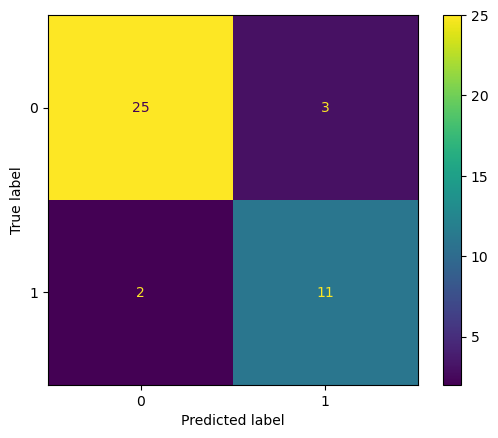


Evaluation: roc


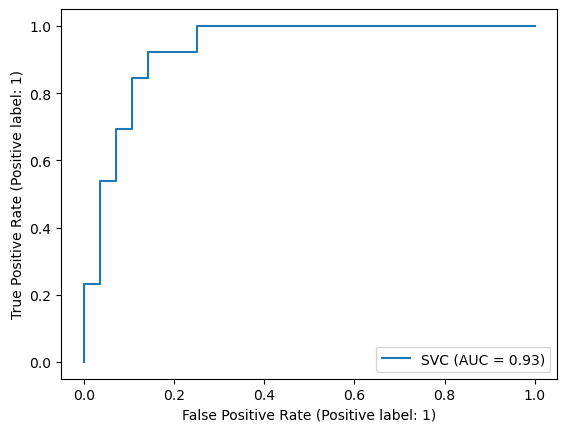

[(0.7607361963190183, 0.8148148148148148),
 (0.8318965517241379, 0.8780487804878049),
 (0.8266666666666667, 0.8461538461538461),
 (0.7045454545454546, 0.7857142857142857)]

In [6]:
print('F1 macro best model: {} evaluation'.format(type(best_model_dict['f1_macro']).__name__))
model_eval(best_model_dict['f1_macro'], X_train, X_test, y_train, y_test, confusion=True, roc=True)

Recall best model: SVC evaluation

Evaluation: f1_score
73.33% for the train data
74.29% for the test data

Evaluation: accuracy_score
79.31% for the train data
78.05% for the test data

Evaluation: recall_score
88.00% for the train data
100.00% for the test data

Evaluation: precision_score
62.86% for the train data
59.09% for the test data

Evaluation: confusion_matrix


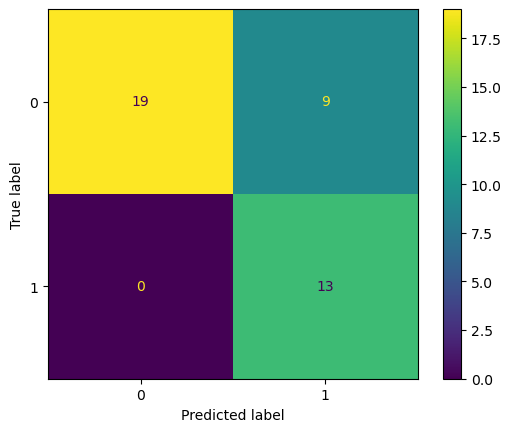


Evaluation: roc


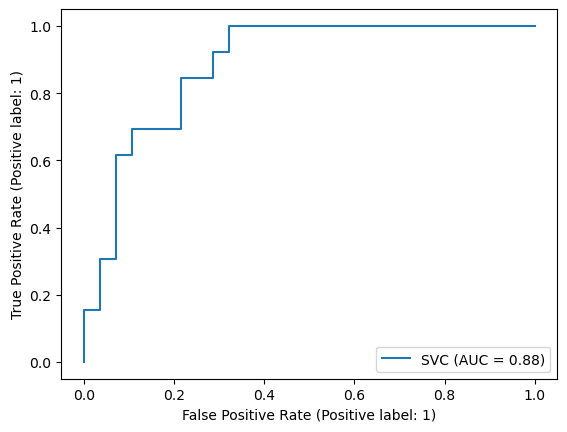

[(0.7333333333333334, 0.7428571428571429),
 (0.7931034482758621, 0.7804878048780488),
 (0.88, 1.0),
 (0.6285714285714286, 0.5909090909090909)]

In [7]:
print('Recall best model: {} evaluation'.format(type(best_model_dict['recall']).__name__))
model_eval(best_model_dict['recall'], X_train, X_test, y_train, y_test, confusion=True, roc=True)

# 2) Find best model with oversample preprocessed dataset

In [5]:
X_train2, X_test2, y_train2, y_test2 = load_train_test_oversampled()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


In [9]:
best_model_dict2 = find_best_models(X_train2, X_test2, y_train2, y_test2, ros='ros')


Scoring: f1_macro

Model: DecisionTreeClassifier

Evaluation: f1_score
94.16% for the train data
58.62% for the test data

Model: DecisionTreeClassifier

Evaluation: f1_score
96.92% for the train data
51.85% for the test data

Model: LogisticRegression

Evaluation: f1_score
89.58% for the train data
49.06% for the test data

Model: LogisticRegression

Evaluation: f1_score
89.23% for the train data
49.06% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
96.99% for the train data
55.56% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
96.92% for the train data
55.56% for the test data

Model: XGBClassifier

Evaluation: f1_score
96.95% for the train data
54.55% for the test data

Model: XGBClassifier

Evaluation: f1_score
96.97% for the train data
56.60% for the test data

Model: SVC

Evaluation: f1_score
95.79% for the train data
43.14% for the test data

Model: SVC

Evaluation: f1_score
95.79% for the train data
43.14% for the test data

Mode

In [10]:
print('F1_macro best model: {} evaluation'.format(type(best_model_dict2['f1_macro']).__name__))
# model_eval(best_model_dict2['f1_macro'], X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

F1_macro best model: Net evaluation


In [11]:
print('Recall best model: {} evaluation'.format(type(best_model_dict2['recall']).__name__))
# model_eval(best_model_dict2['recall'], X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

Recall best model: LogisticRegression evaluation


# 3) Extensive hyperparemeter search with the best model (normal preprocessed dataset)

In [6]:
# define the grid for the hyperparameter search
grid_svm = { 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 'scale', 'auto'],
            'degree': [1, 2, 3, 4], 
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'class_weight': ['balanced', None]
            }

In [7]:
from scipy.stats import uniform
from scipy.stats import randint

rand_svm = {
    'C': uniform(0.01, 100),
    'gamma': uniform(0.0001, 100),
    'degree': [1, 2, 3],
    'kernel': ['rbf', 'poly'],
    'class_weight': ['balanced']
}

In [8]:
svm_model = svm.SVC(random_state=0)

In [15]:
run_gridsearchCV(svm_model, grid_svm, X_train, y_train, scoring='f1_macro', ros='final', verbose=0)


Best hyperparameters : {'C': 0.001, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Best cross-validated f1_macro : 0.792182999202712



Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Evaluation: accuracy_score
83.19% for the train data
87.80% for the test data

Evaluation: recall_score
82.67% for the train data
84.62% for the test data

Evaluation: precision_score
70.45% for the train data
78.57% for the test data

Evaluation: confusion_matrix


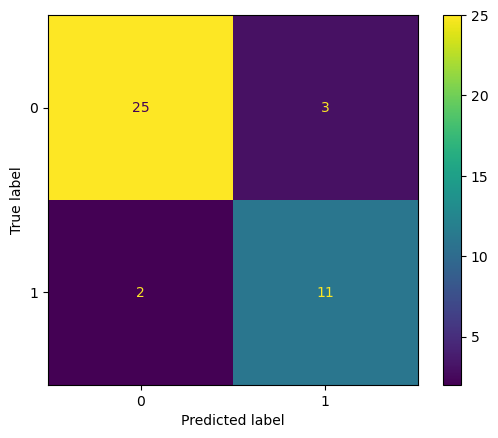


Evaluation: roc


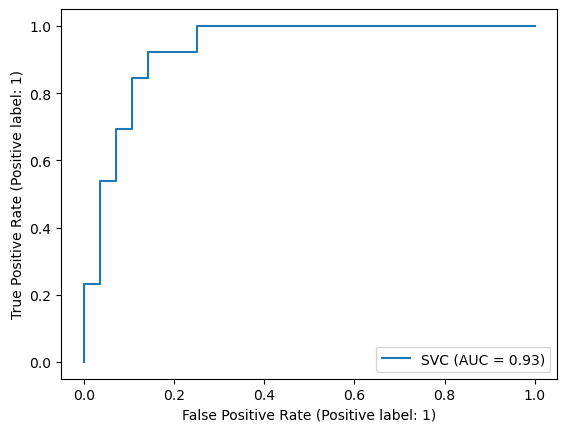

[(0.7607361963190183, 0.8148148148148148),
 (0.8318965517241379, 0.8780487804878049),
 (0.8266666666666667, 0.8461538461538461),
 (0.7045454545454546, 0.7857142857142857)]

In [13]:
f1_best_model_grid = load_model(svm_model, 'f1_macro', ros='final', search='grid')
model_eval(f1_best_model_grid, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [10]:
run_randomizedsearchCV(svm_model, rand_svm, X_train, y_train, scoring='f1_macro', ros='final')

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kernel=poly; total time=   0.0s
[CV] END C=54.89135039273247, class_weight=balanced, degree=2, gamma=84.42667485810173, kerne

[CV] END C=80.10107519796443, class_weight=balanced, degree=2, gamma=78.05301762864555, kernel=rbf; total time=   0.0s
[CV] END C=80.10107519796443, class_weight=balanced, degree=2, gamma=78.05301762864555, kernel=rbf; total time=   0.0s
[CV] END C=80.10107519796443, class_weight=balanced, degree=2, gamma=78.05301762864555, kernel=rbf; total time=   0.0s
[CV] END C=80.10107519796443, class_weight=balanced, degree=2, gamma=78.05301762864555, kernel=rbf; total time=   0.0s
[CV] END C=80.10107519796443, class_weight=balanced, degree=2, gamma=78.05301762864555, kernel=rbf; total time=   0.0s
[CV] END C=80.10107519796443, class_weight=balanced, degree=2, gamma=78.05301762864555, kernel=rbf; total time=   0.0s
[CV] END C=72.07326547259169, class_weight=balanced, degree=2, gamma=14.33542874090464, kernel=poly; total time=   0.0s
[CV] END C=72.07326547259169, class_weight=balanced, degree=2, gamma=14.33542874090464, kernel=poly; total time=   0.0s
[CV] END C=72.07326547259169, class_weight=bal

[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.9s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.5s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.8s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.6s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.6s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.6s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   1.2s
[CV] END C=35.8252166969525, class_weight=balanced, degree=1, gamma=31.542935092418386, kernel=poly; total time=   0.5s
[CV] END C=35.8252166969525, class_weigh

[CV] END C=97.68610881903372, class_weight=balanced, degree=2, gamma=73.92645793983017, kernel=rbf; total time=   0.0s
[CV] END C=97.68610881903372, class_weight=balanced, degree=2, gamma=73.92645793983017, kernel=rbf; total time=   0.0s
[CV] END C=97.68610881903372, class_weight=balanced, degree=2, gamma=73.92645793983017, kernel=rbf; total time=   0.0s
[CV] END C=97.68610881903372, class_weight=balanced, degree=2, gamma=73.92645793983017, kernel=rbf; total time=   0.0s
[CV] END C=97.68610881903372, class_weight=balanced, degree=2, gamma=73.92645793983017, kernel=rbf; total time=   0.0s
[CV] END C=97.68610881903372, class_weight=balanced, degree=2, gamma=73.92645793983017, kernel=rbf; total time=   0.0s
[CV] END C=44.181092124884536, class_weight=balanced, degree=3, gamma=35.944546396932154, kernel=poly; total time=   0.0s
[CV] END C=44.181092124884536, class_weight=balanced, degree=3, gamma=35.944546396932154, kernel=poly; total time=   0.0s
[CV] END C=44.181092124884536, class_weigh

[CV] END C=16.504046024188415, class_weight=balanced, degree=2, gamma=0.46964761925470655, kernel=poly; total time=   0.0s
[CV] END C=16.504046024188415, class_weight=balanced, degree=2, gamma=0.46964761925470655, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weight=balanced, degree=3, gamma=73.5195022122595, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weight=balanced, degree=3, gamma=73.5195022122595, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weight=balanced, degree=3, gamma=73.5195022122595, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weight=balanced, degree=3, gamma=73.5195022122595, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weight=balanced, degree=3, gamma=73.5195022122595, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weight=balanced, degree=3, gamma=73.5195022122595, kernel=poly; total time=   0.0s
[CV] END C=56.97184059233067, class_weig

[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   2.9s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   0.9s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   2.0s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   0.7s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   1.2s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   0.8s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   1.6s
[CV] END C=66.02735374926851, class_weight=balanced, degree=1, gamma=38.34632250349479, kernel=poly; total time=   1.3s
[CV] END C=66.02735374926851, class_weig

[CV] END C=16.259293467637484, class_weight=balanced, degree=2, gamma=12.382098284944151, kernel=poly; total time=   0.0s
[CV] END C=16.259293467637484, class_weight=balanced, degree=2, gamma=12.382098284944151, kernel=poly; total time=   0.0s
[CV] END C=16.259293467637484, class_weight=balanced, degree=2, gamma=12.382098284944151, kernel=poly; total time=   0.0s
[CV] END C=16.259293467637484, class_weight=balanced, degree=2, gamma=12.382098284944151, kernel=poly; total time=   0.0s
[CV] END C=16.259293467637484, class_weight=balanced, degree=2, gamma=12.382098284944151, kernel=poly; total time=   0.0s
[CV] END C=16.259293467637484, class_weight=balanced, degree=2, gamma=12.382098284944151, kernel=poly; total time=   0.0s
[CV] END C=86.50332956024927, class_weight=balanced, degree=2, gamma=56.910173861459334, kernel=poly; total time=   0.0s
[CV] END C=86.50332956024927, class_weight=balanced, degree=2, gamma=56.910173861459334, kernel=poly; total time=   0.0s
[CV] END C=86.503329560249

[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   0.8s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   1.9s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=  11.2s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   5.9s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   2.6s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   2.2s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   2.5s
[CV] END C=92.81812934655909, class_weight=balanced, degree=1, gamma=59.66564062950531, kernel=poly; total time=   1.7s
[CV] END C=92.81812934655909, class_weig

[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=6.7349631463248585, class_weight=balanced, degree=2, gamma=47.85973256187501, kernel=poly; total time=   0.0s
[CV] END C=53.66792111087222, cl

[CV] END C=51.830071393066326, class_weight=balanced, degree=3, gamma=20.74710754411094, kernel=rbf; total time=   0.0s
[CV] END C=51.830071393066326, class_weight=balanced, degree=3, gamma=20.74710754411094, kernel=rbf; total time=   0.0s
[CV] END C=73.05421765667944, class_weight=balanced, degree=2, gamma=46.35764243648107, kernel=poly; total time=   0.0s
[CV] END C=73.05421765667944, class_weight=balanced, degree=2, gamma=46.35764243648107, kernel=poly; total time=   0.0s
[CV] END C=73.05421765667944, class_weight=balanced, degree=2, gamma=46.35764243648107, kernel=poly; total time=   0.0s
[CV] END C=73.05421765667944, class_weight=balanced, degree=2, gamma=46.35764243648107, kernel=poly; total time=   0.0s
[CV] END C=73.05421765667944, class_weight=balanced, degree=2, gamma=46.35764243648107, kernel=poly; total time=   0.0s
[CV] END C=73.05421765667944, class_weight=balanced, degree=2, gamma=46.35764243648107, kernel=poly; total time=   0.0s
[CV] END C=73.05421765667944, class_weig

[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   1.1s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   0.5s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   1.6s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   0.9s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   0.8s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   0.4s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   0.6s
[CV] END C=58.45760689557689, class_weight=balanced, degree=1, gamma=20.915802948084114, kernel=poly; total time=   0.4s
[CV] END C=58.45760689557689, cl

[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balanced, degree=3, gamma=49.81412255074701, kernel=rbf; total time=   0.0s
[CV] END C=63.05479368667911, class_weight=balan

[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=78.8972777719464, class_weight=balanced, degree=3, gamma=77.40483326986389, kernel=poly; total time=   0.0s
[CV] END C=39.95989103160902, class_weight=balanced, degree=3, gamma=40.724217141380734, kernel=poly; total time=   0.0s
[CV] END C=39.95989103160902, class_weight=bal

[CV] END C=38.002695590012046, class_weight=balanced, degree=2, gamma=50.934306536818674, kernel=poly; total time=   0.0s
[CV] END C=38.002695590012046, class_weight=balanced, degree=2, gamma=50.934306536818674, kernel=poly; total time=   0.0s
[CV] END C=38.002695590012046, class_weight=balanced, degree=2, gamma=50.934306536818674, kernel=poly; total time=   0.0s
[CV] END C=38.002695590012046, class_weight=balanced, degree=2, gamma=50.934306536818674, kernel=poly; total time=   0.0s
[CV] END C=38.002695590012046, class_weight=balanced, degree=2, gamma=50.934306536818674, kernel=poly; total time=   0.0s
[CV] END C=38.002695590012046, class_weight=balanced, degree=2, gamma=50.934306536818674, kernel=poly; total time=   0.0s
[CV] END C=5.6948076433240296, class_weight=balanced, degree=1, gamma=77.74085618487531, kernel=poly; total time=   0.8s
[CV] END C=5.6948076433240296, class_weight=balanced, degree=1, gamma=77.74085618487531, kernel=poly; total time=   0.2s
[CV] END C=5.6948076433240

[CV] END C=53.932359741375265, class_weight=balanced, degree=2, gamma=39.267667654709435, kernel=poly; total time=   0.0s
[CV] END C=53.932359741375265, class_weight=balanced, degree=2, gamma=39.267667654709435, kernel=poly; total time=   0.0s
[CV] END C=53.932359741375265, class_weight=balanced, degree=2, gamma=39.267667654709435, kernel=poly; total time=   0.0s
[CV] END C=53.932359741375265, class_weight=balanced, degree=2, gamma=39.267667654709435, kernel=poly; total time=   0.0s
[CV] END C=53.932359741375265, class_weight=balanced, degree=2, gamma=39.267667654709435, kernel=poly; total time=   0.0s
[CV] END C=15.997006714292528, class_weight=balanced, degree=3, gamma=90.3984954928237, kernel=rbf; total time=   0.0s
[CV] END C=15.997006714292528, class_weight=balanced, degree=3, gamma=90.3984954928237, kernel=rbf; total time=   0.0s
[CV] END C=15.997006714292528, class_weight=balanced, degree=3, gamma=90.3984954928237, kernel=rbf; total time=   0.0s
[CV] END C=15.997006714292528, cl

[CV] END C=93.68464737894554, class_weight=balanced, degree=2, gamma=25.86850668894077, kernel=rbf; total time=   0.0s
[CV] END C=93.68464737894554, class_weight=balanced, degree=2, gamma=25.86850668894077, kernel=rbf; total time=   0.0s
[CV] END C=93.68464737894554, class_weight=balanced, degree=2, gamma=25.86850668894077, kernel=rbf; total time=   0.0s
[CV] END C=93.68464737894554, class_weight=balanced, degree=2, gamma=25.86850668894077, kernel=rbf; total time=   0.0s
[CV] END C=74.23379779316829, class_weight=balanced, degree=1, gamma=95.89837218634736, kernel=poly; total time=   5.4s
[CV] END C=74.23379779316829, class_weight=balanced, degree=1, gamma=95.89837218634736, kernel=poly; total time=  16.1s
[CV] END C=74.23379779316829, class_weight=balanced, degree=1, gamma=95.89837218634736, kernel=poly; total time=   6.3s
[CV] END C=74.23379779316829, class_weight=balanced, degree=1, gamma=95.89837218634736, kernel=poly; total time=   4.8s
[CV] END C=74.23379779316829, class_weight=b

[CV] END C=58.02517162709771, class_weight=balanced, degree=2, gamma=13.105623121525774, kernel=poly; total time=   0.0s
[CV] END C=58.02517162709771, class_weight=balanced, degree=2, gamma=13.105623121525774, kernel=poly; total time=   0.0s
[CV] END C=58.02517162709771, class_weight=balanced, degree=2, gamma=13.105623121525774, kernel=poly; total time=   0.0s
[CV] END C=58.02517162709771, class_weight=balanced, degree=2, gamma=13.105623121525774, kernel=poly; total time=   0.0s
[CV] END C=58.02517162709771, class_weight=balanced, degree=2, gamma=13.105623121525774, kernel=poly; total time=   0.0s
[CV] END C=49.11247409007272, class_weight=balanced, degree=3, gamma=24.465241426217705, kernel=poly; total time=   0.0s
[CV] END C=49.11247409007272, class_weight=balanced, degree=3, gamma=24.465241426217705, kernel=poly; total time=   0.0s
[CV] END C=49.11247409007272, class_weight=balanced, degree=3, gamma=24.465241426217705, kernel=poly; total time=   0.0s
[CV] END C=49.11247409007272, cl

[CV] END C=41.4956869333564, class_weight=balanced, degree=3, gamma=96.8904041099436, kernel=poly; total time=   0.0s
[CV] END C=41.4956869333564, class_weight=balanced, degree=3, gamma=96.8904041099436, kernel=poly; total time=   0.0s
[CV] END C=41.4956869333564, class_weight=balanced, degree=3, gamma=96.8904041099436, kernel=poly; total time=   0.0s
[CV] END C=41.4956869333564, class_weight=balanced, degree=3, gamma=96.8904041099436, kernel=poly; total time=   0.0s
[CV] END C=41.4956869333564, class_weight=balanced, degree=3, gamma=96.8904041099436, kernel=poly; total time=   0.0s
[CV] END C=92.50669119531922, class_weight=balanced, degree=1, gamma=73.8683659213446, kernel=rbf; total time=   0.0s
[CV] END C=92.50669119531922, class_weight=balanced, degree=1, gamma=73.8683659213446, kernel=rbf; total time=   0.0s
[CV] END C=92.50669119531922, class_weight=balanced, degree=1, gamma=73.8683659213446, kernel=rbf; total time=   0.0s
[CV] END C=92.50669119531922, class_weight=balanced, deg

[CV] END C=23.790724253903885, class_weight=balanced, degree=3, gamma=50.39346118794356, kernel=poly; total time=   0.0s
[CV] END C=23.790724253903885, class_weight=balanced, degree=3, gamma=50.39346118794356, kernel=poly; total time=   0.0s
[CV] END C=23.790724253903885, class_weight=balanced, degree=3, gamma=50.39346118794356, kernel=poly; total time=   0.0s
[CV] END C=23.790724253903885, class_weight=balanced, degree=3, gamma=50.39346118794356, kernel=poly; total time=   0.0s
[CV] END C=30.45684073773195, class_weight=balanced, degree=2, gamma=35.18715609272556, kernel=rbf; total time=   0.0s
[CV] END C=30.45684073773195, class_weight=balanced, degree=2, gamma=35.18715609272556, kernel=rbf; total time=   0.0s
[CV] END C=30.45684073773195, class_weight=balanced, degree=2, gamma=35.18715609272556, kernel=rbf; total time=   0.0s
[CV] END C=30.45684073773195, class_weight=balanced, degree=2, gamma=35.18715609272556, kernel=rbf; total time=   0.0s
[CV] END C=30.45684073773195, class_weig

[CV] END C=38.290805915785405, class_weight=balanced, degree=1, gamma=7.24354474657973, kernel=poly; total time=   0.2s
[CV] END C=38.290805915785405, class_weight=balanced, degree=1, gamma=7.24354474657973, kernel=poly; total time=   0.1s
[CV] END C=38.290805915785405, class_weight=balanced, degree=1, gamma=7.24354474657973, kernel=poly; total time=   0.2s
[CV] END C=38.290805915785405, class_weight=balanced, degree=1, gamma=7.24354474657973, kernel=poly; total time=   0.2s
[CV] END C=54.698490166942214, class_weight=balanced, degree=1, gamma=14.847908772497185, kernel=poly; total time=   0.9s
[CV] END C=54.698490166942214, class_weight=balanced, degree=1, gamma=14.847908772497185, kernel=poly; total time=   0.3s
[CV] END C=54.698490166942214, class_weight=balanced, degree=1, gamma=14.847908772497185, kernel=poly; total time=   0.6s
[CV] END C=54.698490166942214, class_weight=balanced, degree=1, gamma=14.847908772497185, kernel=poly; total time=   0.5s
[CV] END C=54.698490166942214, c

[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=51.255165875908716, class_weight=balanced, degree=3, gamma=74.00985256176826, kernel=rbf; total time=   0.0s
[CV] END C=53.0188935959223, class_weight=balanced, degree=2, gamma=71.05294027223457, kernel=poly; total time=   0.0s
[CV] END C=53.0188935959223, class_weight

[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=60.04922370976396, class_weight=balanced, degree=3, gamma=83.38192342258864, kernel=poly; total time=   0.0s
[CV] END C=1.6971673370039697, class_weight=balanced, degree=2, gamma=44.06670930341381, kernel=poly; total time=   0.0s
[CV] END C=1.6971673370039697, class_we

[CV] END C=91.98828107781584, class_weight=balanced, degree=1, gamma=10.64304068125784, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balanced, degree=2, gamma=56.27841242980727, kernel=rbf; total time=   0.0s
[CV] END C=38.92346771011857, class_weight=balan

[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weight=balanced, degree=2, gamma=59.73039395241212, kernel=poly; total time=   0.0s
[CV] END C=99.80622513286735, class_weig

[CV] END C=59.112690087049124, class_weight=balanced, degree=2, gamma=40.27677596731838, kernel=rbf; total time=   0.0s
[CV] END C=59.112690087049124, class_weight=balanced, degree=2, gamma=40.27677596731838, kernel=rbf; total time=   0.0s
[CV] END C=59.112690087049124, class_weight=balanced, degree=2, gamma=40.27677596731838, kernel=rbf; total time=   0.0s
[CV] END C=59.112690087049124, class_weight=balanced, degree=2, gamma=40.27677596731838, kernel=rbf; total time=   0.0s
[CV] END C=99.93779939221712, class_weight=balanced, degree=1, gamma=44.814383193205785, kernel=poly; total time=   1.9s
[CV] END C=99.93779939221712, class_weight=balanced, degree=1, gamma=44.814383193205785, kernel=poly; total time=   2.7s
[CV] END C=99.93779939221712, class_weight=balanced, degree=1, gamma=44.814383193205785, kernel=poly; total time=   1.9s
[CV] END C=99.93779939221712, class_weight=balanced, degree=1, gamma=44.814383193205785, kernel=poly; total time=   3.8s
[CV] END C=99.93779939221712, class_

[CV] END C=93.65681001409745, class_weight=balanced, degree=3, gamma=84.81513803469849, kernel=poly; total time=   0.0s
[CV] END C=93.65681001409745, class_weight=balanced, degree=3, gamma=84.81513803469849, kernel=poly; total time=   0.0s
[CV] END C=93.65681001409745, class_weight=balanced, degree=3, gamma=84.81513803469849, kernel=poly; total time=   0.0s
[CV] END C=93.65681001409745, class_weight=balanced, degree=3, gamma=84.81513803469849, kernel=poly; total time=   0.0s
[CV] END C=93.65681001409745, class_weight=balanced, degree=3, gamma=84.81513803469849, kernel=poly; total time=   0.0s
[CV] END C=59.63111203627752, class_weight=balanced, degree=1, gamma=39.98026922245259, kernel=poly; total time=   2.9s
[CV] END C=59.63111203627752, class_weight=balanced, degree=1, gamma=39.98026922245259, kernel=poly; total time=   1.9s
[CV] END C=59.63111203627752, class_weight=balanced, degree=1, gamma=39.98026922245259, kernel=poly; total time=   3.4s
[CV] END C=59.63111203627752, class_weig

[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weight=balanced, degree=1, gamma=39.916214525477315, kernel=rbf; total time=   0.0s
[CV] END C=39.97673721014476, class_weig

[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   3.5s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   0.7s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   1.1s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   0.9s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   1.2s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   1.7s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   0.9s
[CV] END C=35.532519811334375, class_weight=balanced, degree=1, gamma=51.81508137911744, kernel=poly; total time=   1.1s
[CV] END C=35.532519811334375, c

[CV] END C=87.84724953799942, class_weight=balanced, degree=3, gamma=91.80929510072652, kernel=poly; total time=   0.0s
[CV] END C=87.84724953799942, class_weight=balanced, degree=3, gamma=91.80929510072652, kernel=poly; total time=   0.0s
[CV] END C=87.84724953799942, class_weight=balanced, degree=3, gamma=91.80929510072652, kernel=poly; total time=   0.0s
[CV] END C=87.84724953799942, class_weight=balanced, degree=3, gamma=91.80929510072652, kernel=poly; total time=   0.0s
[CV] END C=36.46446259967866, class_weight=balanced, degree=2, gamma=64.23527493634607, kernel=poly; total time=   0.0s
[CV] END C=36.46446259967866, class_weight=balanced, degree=2, gamma=64.23527493634607, kernel=poly; total time=   0.0s
[CV] END C=36.46446259967866, class_weight=balanced, degree=2, gamma=64.23527493634607, kernel=poly; total time=   0.0s
[CV] END C=36.46446259967866, class_weight=balanced, degree=2, gamma=64.23527493634607, kernel=poly; total time=   0.0s
[CV] END C=36.46446259967866, class_weig

[CV] END C=71.97201578422882, class_weight=balanced, degree=1, gamma=32.837994937124506, kernel=rbf; total time=   0.0s
[CV] END C=71.97201578422882, class_weight=balanced, degree=1, gamma=32.837994937124506, kernel=rbf; total time=   0.0s
[CV] END C=71.97201578422882, class_weight=balanced, degree=1, gamma=32.837994937124506, kernel=rbf; total time=   0.0s
[CV] END C=71.97201578422882, class_weight=balanced, degree=1, gamma=32.837994937124506, kernel=rbf; total time=   0.0s
[CV] END C=71.97201578422882, class_weight=balanced, degree=1, gamma=32.837994937124506, kernel=rbf; total time=   0.0s
[CV] END C=30.050368315848722, class_weight=balanced, degree=3, gamma=41.52809467058384, kernel=rbf; total time=   0.0s
[CV] END C=30.050368315848722, class_weight=balanced, degree=3, gamma=41.52809467058384, kernel=rbf; total time=   0.0s
[CV] END C=30.050368315848722, class_weight=balanced, degree=3, gamma=41.52809467058384, kernel=rbf; total time=   0.0s
[CV] END C=30.050368315848722, class_wei

[CV] END C=6.518248144298467, class_weight=balanced, degree=1, gamma=67.56901476442668, kernel=poly; total time=   0.5s
[CV] END C=6.518248144298467, class_weight=balanced, degree=1, gamma=67.56901476442668, kernel=poly; total time=   0.3s
[CV] END C=6.518248144298467, class_weight=balanced, degree=1, gamma=67.56901476442668, kernel=poly; total time=   0.2s
[CV] END C=6.518248144298467, class_weight=balanced, degree=1, gamma=67.56901476442668, kernel=poly; total time=   0.2s
[CV] END C=6.518248144298467, class_weight=balanced, degree=1, gamma=67.56901476442668, kernel=poly; total time=   0.2s
[CV] END C=6.518248144298467, class_weight=balanced, degree=1, gamma=67.56901476442668, kernel=poly; total time=   0.4s
[CV] END C=53.89685033951495, class_weight=balanced, degree=1, gamma=16.604882452124567, kernel=rbf; total time=   0.0s
[CV] END C=53.89685033951495, class_weight=balanced, degree=1, gamma=16.604882452124567, kernel=rbf; total time=   0.0s
[CV] END C=53.89685033951495, class_weig

[CV] END C=77.23655830970695, class_weight=balanced, degree=3, gamma=93.25622038573404, kernel=poly; total time=   0.0s
[CV] END C=77.23655830970695, class_weight=balanced, degree=3, gamma=93.25622038573404, kernel=poly; total time=   0.0s
[CV] END C=77.23655830970695, class_weight=balanced, degree=3, gamma=93.25622038573404, kernel=poly; total time=   0.0s
[CV] END C=77.23655830970695, class_weight=balanced, degree=3, gamma=93.25622038573404, kernel=poly; total time=   0.0s
[CV] END C=77.23655830970695, class_weight=balanced, degree=3, gamma=93.25622038573404, kernel=poly; total time=   0.0s
[CV] END C=77.23655830970695, class_weight=balanced, degree=3, gamma=93.25622038573404, kernel=poly; total time=   0.0s
[CV] END C=93.16050336880878, class_weight=balanced, degree=1, gamma=22.44679384017105, kernel=rbf; total time=   0.0s
[CV] END C=93.16050336880878, class_weight=balanced, degree=1, gamma=22.44679384017105, kernel=rbf; total time=   0.0s
[CV] END C=93.16050336880878, class_weight

[CV] END C=15.924623694224284, class_weight=balanced, degree=2, gamma=11.566287190501331, kernel=rbf; total time=   0.0s
[CV] END C=15.924623694224284, class_weight=balanced, degree=2, gamma=11.566287190501331, kernel=rbf; total time=   0.0s
[CV] END C=85.45600280930272, class_weight=balanced, degree=2, gamma=81.19395616910194, kernel=poly; total time=   0.0s
[CV] END C=85.45600280930272, class_weight=balanced, degree=2, gamma=81.19395616910194, kernel=poly; total time=   0.0s
[CV] END C=85.45600280930272, class_weight=balanced, degree=2, gamma=81.19395616910194, kernel=poly; total time=   0.0s
[CV] END C=85.45600280930272, class_weight=balanced, degree=2, gamma=81.19395616910194, kernel=poly; total time=   0.0s
[CV] END C=85.45600280930272, class_weight=balanced, degree=2, gamma=81.19395616910194, kernel=poly; total time=   0.0s
[CV] END C=85.45600280930272, class_weight=balanced, degree=2, gamma=81.19395616910194, kernel=poly; total time=   0.0s
[CV] END C=85.45600280930272, class_we

[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   1.3s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.2s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.4s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.3s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.3s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.4s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.5s
[CV] END C=48.36181274274587, class_weight=balanced, degree=1, gamma=12.768964154067094, kernel=poly; total time=   0.2s
[CV] END C=48.36181274274587, cl

[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, degree=1, gamma=77.0873756568648, kernel=rbf; total time=   0.0s
[CV] END C=68.46527391473238, class_weight=balanced, deg

[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.3s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.2s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.3s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.1s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.2s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.3s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.4s
[CV] END C=33.45737414961148, class_weight=balanced, degree=1, gamma=11.589946882587974, kernel=poly; total time=   0.2s
[CV] END C=33.45737414961148, cl

[CV] END C=24.413242795584527, class_weight=balanced, degree=1, gamma=77.31110525054193, kernel=poly; total time=   0.9s
[CV] END C=24.413242795584527, class_weight=balanced, degree=1, gamma=77.31110525054193, kernel=poly; total time=   1.0s
[CV] END C=23.811127749047902, class_weight=balanced, degree=3, gamma=72.74817400981556, kernel=rbf; total time=   0.0s
[CV] END C=23.811127749047902, class_weight=balanced, degree=3, gamma=72.74817400981556, kernel=rbf; total time=   0.0s
[CV] END C=23.811127749047902, class_weight=balanced, degree=3, gamma=72.74817400981556, kernel=rbf; total time=   0.0s
[CV] END C=23.811127749047902, class_weight=balanced, degree=3, gamma=72.74817400981556, kernel=rbf; total time=   0.0s
[CV] END C=23.811127749047902, class_weight=balanced, degree=3, gamma=72.74817400981556, kernel=rbf; total time=   0.0s
[CV] END C=23.811127749047902, class_weight=balanced, degree=3, gamma=72.74817400981556, kernel=rbf; total time=   0.0s
[CV] END C=23.811127749047902, class_w

[CV] END C=29.09409066567426, class_weight=balanced, degree=1, gamma=44.07781926038389, kernel=rbf; total time=   0.0s
[CV] END C=29.09409066567426, class_weight=balanced, degree=1, gamma=44.07781926038389, kernel=rbf; total time=   0.0s
[CV] END C=29.09409066567426, class_weight=balanced, degree=1, gamma=44.07781926038389, kernel=rbf; total time=   0.0s
[CV] END C=48.01608878207556, class_weight=balanced, degree=1, gamma=75.38910662482235, kernel=poly; total time=   1.6s
[CV] END C=48.01608878207556, class_weight=balanced, degree=1, gamma=75.38910662482235, kernel=poly; total time=   1.9s
[CV] END C=48.01608878207556, class_weight=balanced, degree=1, gamma=75.38910662482235, kernel=poly; total time=   5.1s
[CV] END C=48.01608878207556, class_weight=balanced, degree=1, gamma=75.38910662482235, kernel=poly; total time=   2.2s
[CV] END C=48.01608878207556, class_weight=balanced, degree=1, gamma=75.38910662482235, kernel=poly; total time=   3.0s
[CV] END C=48.01608878207556, class_weight=

[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.2s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weight=balanced, degree=1, gamma=0.968431698524838, kernel=poly; total time=   0.0s
[CV] END C=82.89409062040862, class_weig

[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balanced, degree=3, gamma=93.08404544480024, kernel=rbf; total time=   0.0s
[CV] END C=1.016369565609333, class_weight=balan

[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   1.8s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   2.5s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   4.8s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   2.5s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   3.5s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   2.6s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   3.4s
[CV] END C=77.83761672964438, class_weight=balanced, degree=1, gamma=67.07626559447341, kernel=poly; total time=   1.3s
[CV] END C=77.83761672964438, class_weig

[CV] END C=43.021598437673994, class_weight=balanced, degree=2, gamma=85.32469761585129, kernel=rbf; total time=   0.0s
[CV] END C=43.021598437673994, class_weight=balanced, degree=2, gamma=85.32469761585129, kernel=rbf; total time=   0.0s
[CV] END C=43.021598437673994, class_weight=balanced, degree=2, gamma=85.32469761585129, kernel=rbf; total time=   0.0s
[CV] END C=33.07005296796998, class_weight=balanced, degree=3, gamma=26.563354754144726, kernel=poly; total time=   0.0s
[CV] END C=33.07005296796998, class_weight=balanced, degree=3, gamma=26.563354754144726, kernel=poly; total time=   0.0s
[CV] END C=33.07005296796998, class_weight=balanced, degree=3, gamma=26.563354754144726, kernel=poly; total time=   0.0s
[CV] END C=33.07005296796998, class_weight=balanced, degree=3, gamma=26.563354754144726, kernel=poly; total time=   0.0s
[CV] END C=33.07005296796998, class_weight=balanced, degree=3, gamma=26.563354754144726, kernel=poly; total time=   0.0s
[CV] END C=33.07005296796998, class

[CV] END C=56.30474419315365, class_weight=balanced, degree=2, gamma=52.06787914825536, kernel=poly; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, class_weight=balanced, degree=3, gamma=24.362452466089866, kernel=rbf; total time=   0.0s
[CV] END C=41.215244343356005, cl

[CV] END C=35.641498169861606, class_weight=balanced, degree=2, gamma=80.74195272001148, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, degree=2, gamma=77.37114057028639, kernel=rbf; total time=   0.0s
[CV] END C=82.8246613216695, class_weight=balanced, de

[CV] END C=36.331397861755754, class_weight=balanced, degree=2, gamma=60.33239922907446, kernel=rbf; total time=   0.0s
[CV] END C=36.331397861755754, class_weight=balanced, degree=2, gamma=60.33239922907446, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_weight=balanced, degree=2, gamma=69.59478588151882, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_weight=balanced, degree=2, gamma=69.59478588151882, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_weight=balanced, degree=2, gamma=69.59478588151882, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_weight=balanced, degree=2, gamma=69.59478588151882, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_weight=balanced, degree=2, gamma=69.59478588151882, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_weight=balanced, degree=2, gamma=69.59478588151882, kernel=rbf; total time=   0.0s
[CV] END C=36.859096106881516, class_wei

[CV] END C=63.40869213059075, class_weight=balanced, degree=3, gamma=64.47353399279491, kernel=rbf; total time=   0.0s
[CV] END C=63.40869213059075, class_weight=balanced, degree=3, gamma=64.47353399279491, kernel=rbf; total time=   0.0s
[CV] END C=80.03556035835236, class_weight=balanced, degree=2, gamma=98.77593893150484, kernel=poly; total time=   0.0s
[CV] END C=80.03556035835236, class_weight=balanced, degree=2, gamma=98.77593893150484, kernel=poly; total time=   0.0s
[CV] END C=80.03556035835236, class_weight=balanced, degree=2, gamma=98.77593893150484, kernel=poly; total time=   0.0s
[CV] END C=80.03556035835236, class_weight=balanced, degree=2, gamma=98.77593893150484, kernel=poly; total time=   0.0s
[CV] END C=80.03556035835236, class_weight=balanced, degree=2, gamma=98.77593893150484, kernel=poly; total time=   0.0s
[CV] END C=80.03556035835236, class_weight=balanced, degree=2, gamma=98.77593893150484, kernel=poly; total time=   0.0s
[CV] END C=80.03556035835236, class_weight

[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_weight=balanced, degree=1, gamma=13.55494331085064, kernel=rbf; total time=   0.0s
[CV] END C=26.386768645046214, class_wei

[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weight=balanced, degree=3, gamma=81.52260407163728, kernel=poly; total time=   0.0s
[CV] END C=46.10093930486534, class_weig

[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.9s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.5s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.6s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.5s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.5s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.6s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.5s
[CV] END C=77.13411813790806, class_weight=balanced, degree=1, gamma=13.91342846704053, kernel=poly; total time=   0.5s
[CV] END C=77.13411813790806, class_weig

[CV] END C=74.98014447921214, class_weight=balanced, degree=2, gamma=11.891794214601356, kernel=poly; total time=   0.0s
[CV] END C=74.98014447921214, class_weight=balanced, degree=2, gamma=11.891794214601356, kernel=poly; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=balanced, degree=1, gamma=69.37480232392139, kernel=rbf; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=balanced, degree=1, gamma=69.37480232392139, kernel=rbf; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=balanced, degree=1, gamma=69.37480232392139, kernel=rbf; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=balanced, degree=1, gamma=69.37480232392139, kernel=rbf; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=balanced, degree=1, gamma=69.37480232392139, kernel=rbf; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=balanced, degree=1, gamma=69.37480232392139, kernel=rbf; total time=   0.0s
[CV] END C=90.88334407983848, class_weight=b

[CV] END C=55.25403493765467, class_weight=balanced, degree=3, gamma=47.332720044914325, kernel=rbf; total time=   0.0s
[CV] END C=55.25403493765467, class_weight=balanced, degree=3, gamma=47.332720044914325, kernel=rbf; total time=   0.0s
[CV] END C=55.25403493765467, class_weight=balanced, degree=3, gamma=47.332720044914325, kernel=rbf; total time=   0.0s
[CV] END C=55.25403493765467, class_weight=balanced, degree=3, gamma=47.332720044914325, kernel=rbf; total time=   0.0s
[CV] END C=26.70458018344542, class_weight=balanced, degree=1, gamma=10.231781588759421, kernel=poly; total time=   0.2s
[CV] END C=26.70458018344542, class_weight=balanced, degree=1, gamma=10.231781588759421, kernel=poly; total time=   0.2s
[CV] END C=26.70458018344542, class_weight=balanced, degree=1, gamma=10.231781588759421, kernel=poly; total time=   0.1s
[CV] END C=26.70458018344542, class_weight=balanced, degree=1, gamma=10.231781588759421, kernel=poly; total time=   0.1s
[CV] END C=26.70458018344542, class_

[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weight=balanced, degree=2, gamma=51.00212010656917, kernel=poly; total time=   0.0s
[CV] END C=74.67881176643697, class_weig

[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   1.3s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   0.7s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   1.4s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   0.9s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   0.7s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   0.8s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   0.7s
[CV] END C=55.27458698851697, class_weight=balanced, degree=1, gamma=32.40533212034009, kernel=poly; total time=   0.8s
[CV] END C=55.27458698851697, class_weig

[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   1.9s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   0.9s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   1.6s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   1.4s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   2.5s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   0.9s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   0.9s
[CV] END C=30.33919214196661, class_weight=balanced, degree=1, gamma=75.57389812769748, kernel=poly; total time=   1.1s
[CV] END C=30.33919214196661, class_weig

[CV] END C=91.72519672445634, class_weight=balanced, degree=3, gamma=70.18414829444163, kernel=poly; total time=   0.0s
[CV] END C=91.72519672445634, class_weight=balanced, degree=3, gamma=70.18414829444163, kernel=poly; total time=   0.0s
[CV] END C=91.72519672445634, class_weight=balanced, degree=3, gamma=70.18414829444163, kernel=poly; total time=   0.0s
[CV] END C=91.72519672445634, class_weight=balanced, degree=3, gamma=70.18414829444163, kernel=poly; total time=   0.0s
[CV] END C=91.72519672445634, class_weight=balanced, degree=3, gamma=70.18414829444163, kernel=poly; total time=   0.0s
[CV] END C=43.02456203558997, class_weight=balanced, degree=2, gamma=44.447995535227, kernel=poly; total time=   0.0s
[CV] END C=43.02456203558997, class_weight=balanced, degree=2, gamma=44.447995535227, kernel=poly; total time=   0.0s
[CV] END C=43.02456203558997, class_weight=balanced, degree=2, gamma=44.447995535227, kernel=poly; total time=   0.0s
[CV] END C=43.02456203558997, class_weight=bal

[CV] END C=43.033547802522044, class_weight=balanced, degree=2, gamma=20.126776576086545, kernel=rbf; total time=   0.0s
[CV] END C=43.033547802522044, class_weight=balanced, degree=2, gamma=20.126776576086545, kernel=rbf; total time=   0.0s
[CV] END C=79.44056746599713, class_weight=balanced, degree=1, gamma=91.21519530115889, kernel=poly; total time=   2.3s
[CV] END C=79.44056746599713, class_weight=balanced, degree=1, gamma=91.21519530115889, kernel=poly; total time=   5.0s
[CV] END C=79.44056746599713, class_weight=balanced, degree=1, gamma=91.21519530115889, kernel=poly; total time=  14.3s
[CV] END C=79.44056746599713, class_weight=balanced, degree=1, gamma=91.21519530115889, kernel=poly; total time=   6.1s
[CV] END C=79.44056746599713, class_weight=balanced, degree=1, gamma=91.21519530115889, kernel=poly; total time=   3.1s
[CV] END C=79.44056746599713, class_weight=balanced, degree=1, gamma=91.21519530115889, kernel=poly; total time=   4.7s
[CV] END C=79.44056746599713, class_we

[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   3.6s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   1.4s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   1.3s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   1.5s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   2.0s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   0.7s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   0.8s
[CV] END C=53.40779236287958, class_weight=balanced, degree=1, gamma=56.98352129335561, kernel=poly; total time=   0.7s
[CV] END C=53.40779236287958, class_weig

[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weight=balanced, degree=2, gamma=93.76640939645621, kernel=poly; total time=   0.0s
[CV] END C=94.94698964859977, class_weig

[CV] END C=47.99301884002409, class_weight=balanced, degree=3, gamma=83.04773451209596, kernel=poly; total time=   0.0s
[CV] END C=47.99301884002409, class_weight=balanced, degree=3, gamma=83.04773451209596, kernel=poly; total time=   0.0s
[CV] END C=47.99301884002409, class_weight=balanced, degree=3, gamma=83.04773451209596, kernel=poly; total time=   0.0s
[CV] END C=57.523894357821945, class_weight=balanced, degree=1, gamma=3.8045681535057914, kernel=rbf; total time=   0.0s
[CV] END C=57.523894357821945, class_weight=balanced, degree=1, gamma=3.8045681535057914, kernel=rbf; total time=   0.0s
[CV] END C=57.523894357821945, class_weight=balanced, degree=1, gamma=3.8045681535057914, kernel=rbf; total time=   0.0s
[CV] END C=57.523894357821945, class_weight=balanced, degree=1, gamma=3.8045681535057914, kernel=rbf; total time=   0.0s
[CV] END C=57.523894357821945, class_weight=balanced, degree=1, gamma=3.8045681535057914, kernel=rbf; total time=   0.0s
[CV] END C=57.523894357821945, clas

[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=62.781692274498035, class_weight=balanced, degree=2, gamma=83.29444141611843, kernel=rbf; total time=   0.0s
[CV] END C=77.203086740896, class_weight

[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=64.4096940094507, class_weight=balanced, degree=2, gamma=19.39917976001973, kernel=poly; total time=   0.0s
[CV] END C=45.696499996666454, class_weight=bala

[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   4.4s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   0.7s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   0.8s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   0.7s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   1.1s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   0.6s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   0.6s
[CV] END C=51.56952477633321, class_weight=balanced, degree=1, gamma=32.895475991898316, kernel=poly; total time=   0.6s
[CV] END C=51.56952477633321, cl

[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=2.804630020239197, class_weight=balanced, degree=3, gamma=41.16274595084367, kernel=poly; total time=   0.0s
[CV] END C=50.186765727298145, class_wei

[CV] END C=34.67078106091718, class_weight=balanced, degree=3, gamma=60.162666326157165, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_weight=balanced, degree=3, gamma=75.13820022852454, kernel=poly; total time=   0.0s
[CV] END C=73.22422191397015, class_wei

[CV] END C=45.168929435903436, class_weight=balanced, degree=1, gamma=80.49365721591272, kernel=rbf; total time=   0.0s
[CV] END C=45.168929435903436, class_weight=balanced, degree=1, gamma=80.49365721591272, kernel=rbf; total time=   0.0s
[CV] END C=45.168929435903436, class_weight=balanced, degree=1, gamma=80.49365721591272, kernel=rbf; total time=   0.0s
[CV] END C=45.168929435903436, class_weight=balanced, degree=1, gamma=80.49365721591272, kernel=rbf; total time=   0.0s
[CV] END C=40.588884062148914, class_weight=balanced, degree=3, gamma=75.74718426618213, kernel=rbf; total time=   0.0s
[CV] END C=40.588884062148914, class_weight=balanced, degree=3, gamma=75.74718426618213, kernel=rbf; total time=   0.0s
[CV] END C=40.588884062148914, class_weight=balanced, degree=3, gamma=75.74718426618213, kernel=rbf; total time=   0.0s
[CV] END C=40.588884062148914, class_weight=balanced, degree=3, gamma=75.74718426618213, kernel=rbf; total time=   0.0s
[CV] END C=40.588884062148914, class_wei

[CV] END C=81.46851222967277, class_weight=balanced, degree=2, gamma=78.74526086137088, kernel=rbf; total time=   0.0s
[CV] END C=81.46851222967277, class_weight=balanced, degree=2, gamma=78.74526086137088, kernel=rbf; total time=   0.0s
[CV] END C=61.444629997963084, class_weight=balanced, degree=3, gamma=57.32477475850282, kernel=poly; total time=   0.0s
[CV] END C=61.444629997963084, class_weight=balanced, degree=3, gamma=57.32477475850282, kernel=poly; total time=   0.0s
[CV] END C=61.444629997963084, class_weight=balanced, degree=3, gamma=57.32477475850282, kernel=poly; total time=   0.0s
[CV] END C=61.444629997963084, class_weight=balanced, degree=3, gamma=57.32477475850282, kernel=poly; total time=   0.0s
[CV] END C=61.444629997963084, class_weight=balanced, degree=3, gamma=57.32477475850282, kernel=poly; total time=   0.0s
[CV] END C=61.444629997963084, class_weight=balanced, degree=3, gamma=57.32477475850282, kernel=poly; total time=   0.0s
[CV] END C=61.444629997963084, class

[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, class_weight=balanced, degree=3, gamma=51.54340866863324, kernel=poly; total time=   0.0s
[CV] END C=24.990295680608966, c

[CV] END C=42.662753284821775, class_weight=balanced, degree=2, gamma=9.412343608551696, kernel=poly; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=balanced, degree=3, gamma=81.84231621817872, kernel=rbf; total time=   0.0s
[CV] END C=4.011707453830672, class_weight=bal

[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=19.659684552509795, class_weight=balanced, degree=3, gamma=66.5960918694057, kernel=poly; total time=   0.0s
[CV] END C=62.190994431594994, class_wei

[CV] END C=21.93793852030676, class_weight=balanced, degree=1, gamma=9.792315484559607, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, degree=3, gamma=84.09925272818747, kernel=rbf; total time=   0.0s
[CV] END C=84.0116697735278, class_weight=balanced, deg

[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=62.67754492304331, class_weight=balanced, degree=3, gamma=81.81020500240291, kernel=poly; total time=   0.0s
[CV] END C=44.85068166617082, class_weight=balanced, degree=3, gamma=78.40596144671541, kernel=poly; total time=   0.0s
[CV] END C=44.85068166617082, class_weig

[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weight=balanced, degree=1, gamma=28.478070503095427, kernel=rbf; total time=   0.0s
[CV] END C=89.08792055016151, class_weig

[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=10.493420725325088, class_weight=balanced, degree=3, gamma=81.43984612438904, kernel=poly; total time=   0.0s
[CV] END C=11.812031124187916, class_weight=balanced, degree=1, gamma=39.88485267787729, kernel=rbf; total time=   0.0s
[CV] END C=11.812031124187916, cl

[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   3.4s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   0.7s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   1.7s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   1.2s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   1.7s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   0.9s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   0.8s
[CV] END C=22.75238885718227, class_weight=balanced, degree=1, gamma=88.78353062834697, kernel=poly; total time=   1.0s
[CV] END C=22.75238885718227, class_weig

[CV] END C=11.76459407560635, class_weight=balanced, degree=1, gamma=75.74385412279564, kernel=rbf; total time=   0.0s
[CV] END C=11.76459407560635, class_weight=balanced, degree=1, gamma=75.74385412279564, kernel=rbf; total time=   0.0s
[CV] END C=11.76459407560635, class_weight=balanced, degree=1, gamma=75.74385412279564, kernel=rbf; total time=   0.0s
[CV] END C=14.813867927776204, class_weight=balanced, degree=1, gamma=31.15492256932277, kernel=rbf; total time=   0.0s
[CV] END C=14.813867927776204, class_weight=balanced, degree=1, gamma=31.15492256932277, kernel=rbf; total time=   0.0s
[CV] END C=14.813867927776204, class_weight=balanced, degree=1, gamma=31.15492256932277, kernel=rbf; total time=   0.0s
[CV] END C=14.813867927776204, class_weight=balanced, degree=1, gamma=31.15492256932277, kernel=rbf; total time=   0.0s
[CV] END C=14.813867927776204, class_weight=balanced, degree=1, gamma=31.15492256932277, kernel=rbf; total time=   0.0s
[CV] END C=14.813867927776204, class_weight

[CV] END C=22.71177717960579, class_weight=balanced, degree=2, gamma=36.4285574718846, kernel=poly; total time=   0.0s
[CV] END C=22.71177717960579, class_weight=balanced, degree=2, gamma=36.4285574718846, kernel=poly; total time=   0.0s
[CV] END C=22.71177717960579, class_weight=balanced, degree=2, gamma=36.4285574718846, kernel=poly; total time=   0.0s
[CV] END C=22.71177717960579, class_weight=balanced, degree=2, gamma=36.4285574718846, kernel=poly; total time=   0.0s
[CV] END C=78.09851846280236, class_weight=balanced, degree=2, gamma=44.848311417919554, kernel=poly; total time=   0.0s
[CV] END C=78.09851846280236, class_weight=balanced, degree=2, gamma=44.848311417919554, kernel=poly; total time=   0.0s
[CV] END C=78.09851846280236, class_weight=balanced, degree=2, gamma=44.848311417919554, kernel=poly; total time=   0.0s
[CV] END C=78.09851846280236, class_weight=balanced, degree=2, gamma=44.848311417919554, kernel=poly; total time=   0.0s
[CV] END C=78.09851846280236, class_weig

[CV] END C=72.11434084324897, class_weight=balanced, degree=1, gamma=86.67039791268242, kernel=poly; total time=   3.0s
[CV] END C=72.11434084324897, class_weight=balanced, degree=1, gamma=86.67039791268242, kernel=poly; total time=   2.4s
[CV] END C=72.11434084324897, class_weight=balanced, degree=1, gamma=86.67039791268242, kernel=poly; total time=   2.3s
[CV] END C=72.11434084324897, class_weight=balanced, degree=1, gamma=86.67039791268242, kernel=poly; total time=   4.6s
[CV] END C=72.11434084324897, class_weight=balanced, degree=1, gamma=86.67039791268242, kernel=poly; total time=   1.4s
[CV] END C=73.2030277681536, class_weight=balanced, degree=3, gamma=64.22803297140938, kernel=rbf; total time=   0.0s
[CV] END C=73.2030277681536, class_weight=balanced, degree=3, gamma=64.22803297140938, kernel=rbf; total time=   0.0s
[CV] END C=73.2030277681536, class_weight=balanced, degree=3, gamma=64.22803297140938, kernel=rbf; total time=   0.0s
[CV] END C=73.2030277681536, class_weight=bala

[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balanced, degree=3, gamma=39.23121120730404, kernel=rbf; total time=   0.0s
[CV] END C=42.69195151105408, class_weight=balan

[CV] END C=77.92109940193555, class_weight=balanced, degree=3, gamma=81.49506076199943, kernel=poly; total time=   0.0s
[CV] END C=77.92109940193555, class_weight=balanced, degree=3, gamma=81.49506076199943, kernel=poly; total time=   0.0s
[CV] END C=77.92109940193555, class_weight=balanced, degree=3, gamma=81.49506076199943, kernel=poly; total time=   0.0s
[CV] END C=53.70988910428292, class_weight=balanced, degree=3, gamma=2.9854704543296613, kernel=rbf; total time=   0.0s
[CV] END C=53.70988910428292, class_weight=balanced, degree=3, gamma=2.9854704543296613, kernel=rbf; total time=   0.0s
[CV] END C=53.70988910428292, class_weight=balanced, degree=3, gamma=2.9854704543296613, kernel=rbf; total time=   0.0s
[CV] END C=53.70988910428292, class_weight=balanced, degree=3, gamma=2.9854704543296613, kernel=rbf; total time=   0.0s
[CV] END C=53.70988910428292, class_weight=balanced, degree=3, gamma=2.9854704543296613, kernel=rbf; total time=   0.0s
[CV] END C=53.70988910428292, class_weig

[CV] END C=11.505214963711486, class_weight=balanced, degree=1, gamma=37.55503550845426, kernel=rbf; total time=   0.0s
[CV] END C=11.505214963711486, class_weight=balanced, degree=1, gamma=37.55503550845426, kernel=rbf; total time=   0.0s
[CV] END C=11.505214963711486, class_weight=balanced, degree=1, gamma=37.55503550845426, kernel=rbf; total time=   0.0s
[CV] END C=11.505214963711486, class_weight=balanced, degree=1, gamma=37.55503550845426, kernel=rbf; total time=   0.0s
[CV] END C=11.505214963711486, class_weight=balanced, degree=1, gamma=37.55503550845426, kernel=rbf; total time=   0.0s
[CV] END C=54.94483220635136, class_weight=balanced, degree=3, gamma=84.08312424122501, kernel=poly; total time=   0.0s
[CV] END C=54.94483220635136, class_weight=balanced, degree=3, gamma=84.08312424122501, kernel=poly; total time=   0.0s
[CV] END C=54.94483220635136, class_weight=balanced, degree=3, gamma=84.08312424122501, kernel=poly; total time=   0.0s
[CV] END C=54.94483220635136, class_weig

[CV] END C=22.14191192150874, class_weight=balanced, degree=1, gamma=94.82977516582632, kernel=rbf; total time=   0.0s
[CV] END C=22.14191192150874, class_weight=balanced, degree=1, gamma=94.82977516582632, kernel=rbf; total time=   0.0s
[CV] END C=22.14191192150874, class_weight=balanced, degree=1, gamma=94.82977516582632, kernel=rbf; total time=   0.0s
[CV] END C=22.14191192150874, class_weight=balanced, degree=1, gamma=94.82977516582632, kernel=rbf; total time=   0.0s
[CV] END C=22.14191192150874, class_weight=balanced, degree=1, gamma=94.82977516582632, kernel=rbf; total time=   0.0s
[CV] END C=35.64427347391143, class_weight=balanced, degree=3, gamma=58.3138978473822, kernel=rbf; total time=   0.0s
[CV] END C=35.64427347391143, class_weight=balanced, degree=3, gamma=58.3138978473822, kernel=rbf; total time=   0.0s
[CV] END C=35.64427347391143, class_weight=balanced, degree=3, gamma=58.3138978473822, kernel=rbf; total time=   0.0s
[CV] END C=35.64427347391143, class_weight=balanced

[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.9s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.3s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.4s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.2s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.3s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.4s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.3s
[CV] END C=7.688624566611058, class_weight=balanced, degree=1, gamma=90.82740864154142, kernel=poly; total time=   0.2s
[CV] END C=7.688624566611058, class_weig

[CV] END C=63.831910003163074, class_weight=balanced, degree=2, gamma=22.477832839266462, kernel=rbf; total time=   0.0s
[CV] END C=63.831910003163074, class_weight=balanced, degree=2, gamma=22.477832839266462, kernel=rbf; total time=   0.0s
[CV] END C=2.3066240058829743, class_weight=balanced, degree=3, gamma=71.32470130406766, kernel=poly; total time=   0.0s
[CV] END C=2.3066240058829743, class_weight=balanced, degree=3, gamma=71.32470130406766, kernel=poly; total time=   0.0s
[CV] END C=2.3066240058829743, class_weight=balanced, degree=3, gamma=71.32470130406766, kernel=poly; total time=   0.0s
[CV] END C=2.3066240058829743, class_weight=balanced, degree=3, gamma=71.32470130406766, kernel=poly; total time=   0.0s
[CV] END C=2.3066240058829743, class_weight=balanced, degree=3, gamma=71.32470130406766, kernel=poly; total time=   0.0s
[CV] END C=2.3066240058829743, class_weight=balanced, degree=3, gamma=71.32470130406766, kernel=poly; total time=   0.0s
[CV] END C=2.3066240058829743, c

[CV] END C=8.056718397913876, class_weight=balanced, degree=1, gamma=12.953240106802618, kernel=rbf; total time=   0.0s
[CV] END C=8.056718397913876, class_weight=balanced, degree=1, gamma=12.953240106802618, kernel=rbf; total time=   0.0s
[CV] END C=8.056718397913876, class_weight=balanced, degree=1, gamma=12.953240106802618, kernel=rbf; total time=   0.0s
[CV] END C=8.056718397913876, class_weight=balanced, degree=1, gamma=12.953240106802618, kernel=rbf; total time=   0.0s
[CV] END C=8.056718397913876, class_weight=balanced, degree=1, gamma=12.953240106802618, kernel=rbf; total time=   0.0s
[CV] END C=98.75349897163632, class_weight=balanced, degree=2, gamma=61.21818730705581, kernel=rbf; total time=   0.0s
[CV] END C=98.75349897163632, class_weight=balanced, degree=2, gamma=61.21818730705581, kernel=rbf; total time=   0.0s
[CV] END C=98.75349897163632, class_weight=balanced, degree=2, gamma=61.21818730705581, kernel=rbf; total time=   0.0s
[CV] END C=98.75349897163632, class_weight=

[CV] END C=61.06632454438723, class_weight=balanced, degree=2, gamma=38.58289697425317, kernel=rbf; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weight=balanced, degree=2, gamma=57.56350728609815, kernel=poly; total time=   0.0s
[CV] END C=95.76098055983971, class_weigh

[CV] END C=91.0495845764935, class_weight=balanced, degree=3, gamma=23.72090631818536, kernel=rbf; total time=   0.0s
[CV] END C=91.0495845764935, class_weight=balanced, degree=3, gamma=23.72090631818536, kernel=rbf; total time=   0.0s
[CV] END C=91.0495845764935, class_weight=balanced, degree=3, gamma=23.72090631818536, kernel=rbf; total time=   0.0s
[CV] END C=91.0495845764935, class_weight=balanced, degree=3, gamma=23.72090631818536, kernel=rbf; total time=   0.0s
[CV] END C=33.00608837691959, class_weight=balanced, degree=3, gamma=82.08666496687533, kernel=poly; total time=   0.0s
[CV] END C=33.00608837691959, class_weight=balanced, degree=3, gamma=82.08666496687533, kernel=poly; total time=   0.0s
[CV] END C=33.00608837691959, class_weight=balanced, degree=3, gamma=82.08666496687533, kernel=poly; total time=   0.0s
[CV] END C=33.00608837691959, class_weight=balanced, degree=3, gamma=82.08666496687533, kernel=poly; total time=   0.0s
[CV] END C=33.00608837691959, class_weight=balan

[CV] END C=97.9805637053056, class_weight=balanced, degree=1, gamma=51.655694109919615, kernel=rbf; total time=   0.0s
[CV] END C=97.9805637053056, class_weight=balanced, degree=1, gamma=51.655694109919615, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weight=balanced, degree=3, gamma=40.62734969061188, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weight=balanced, degree=3, gamma=40.62734969061188, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weight=balanced, degree=3, gamma=40.62734969061188, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weight=balanced, degree=3, gamma=40.62734969061188, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weight=balanced, degree=3, gamma=40.62734969061188, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weight=balanced, degree=3, gamma=40.62734969061188, kernel=rbf; total time=   0.0s
[CV] END C=5.3969104187597825, class_weigh

[CV] END C=40.6562542043115, class_weight=balanced, degree=3, gamma=53.44330281653596, kernel=rbf; total time=   0.0s
[CV] END C=40.6562542043115, class_weight=balanced, degree=3, gamma=53.44330281653596, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=balanced, degree=1, gamma=25.748930652559608, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=balanced, degree=1, gamma=25.748930652559608, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=balanced, degree=1, gamma=25.748930652559608, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=balanced, degree=1, gamma=25.748930652559608, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=balanced, degree=1, gamma=25.748930652559608, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=balanced, degree=1, gamma=25.748930652559608, kernel=rbf; total time=   0.0s
[CV] END C=68.01837840490205, class_weight=b

[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=39.03304190833069, class_weight=balanced, degree=1, gamma=94.06396129939067, kernel=rbf; total time=   0.0s
[CV] END C=47.88726368177081, class_weight=balan

[CV] END C=71.26231372027769, class_weight=balanced, degree=2, gamma=83.82280444539296, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weight=balanced, degree=3, gamma=25.937481852699946, kernel=rbf; total time=   0.0s
[CV] END C=32.73626783101743, class_weigh

[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.4s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.3s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.6s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   1.0s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.8s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.5s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.4s
[CV] END C=36.12134366437103, class_weight=balanced, degree=1, gamma=22.973458899213192, kernel=poly; total time=   0.3s
[CV] END C=36.12134366437103, cl

[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   0.8s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   0.8s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   1.0s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   1.1s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   0.5s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   0.6s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   1.0s
[CV] END C=18.19730397985249, class_weight=balanced, degree=1, gamma=90.41932273922056, kernel=poly; total time=   0.9s
[CV] END C=18.19730397985249, class_weig

[CV] END C=59.595794364621035, class_weight=balanced, degree=1, gamma=4.45106271486205, kernel=poly; total time=   0.2s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, class_weight=balanced, degree=3, gamma=21.51835792421572, kernel=poly; total time=   0.0s
[CV] END C=10.979515288532294, cl

[CV] END C=75.41903662487175, class_weight=balanced, degree=2, gamma=35.85595546461532, kernel=rbf; total time=   0.0s
[CV] END C=75.41903662487175, class_weight=balanced, degree=2, gamma=35.85595546461532, kernel=rbf; total time=   0.0s
[CV] END C=75.41903662487175, class_weight=balanced, degree=2, gamma=35.85595546461532, kernel=rbf; total time=   0.0s
[CV] END C=75.41903662487175, class_weight=balanced, degree=2, gamma=35.85595546461532, kernel=rbf; total time=   0.0s
[CV] END C=58.474459778786404, class_weight=balanced, degree=1, gamma=60.04720432403803, kernel=rbf; total time=   0.0s
[CV] END C=58.474459778786404, class_weight=balanced, degree=1, gamma=60.04720432403803, kernel=rbf; total time=   0.0s
[CV] END C=58.474459778786404, class_weight=balanced, degree=1, gamma=60.04720432403803, kernel=rbf; total time=   0.0s
[CV] END C=58.474459778786404, class_weight=balanced, degree=1, gamma=60.04720432403803, kernel=rbf; total time=   0.0s
[CV] END C=58.474459778786404, class_weight=

[CV] END C=76.76392416193177, class_weight=balanced, degree=3, gamma=46.059774865450066, kernel=poly; total time=   0.0s
[CV] END C=76.76392416193177, class_weight=balanced, degree=3, gamma=46.059774865450066, kernel=poly; total time=   0.0s
[CV] END C=76.76392416193177, class_weight=balanced, degree=3, gamma=46.059774865450066, kernel=poly; total time=   0.0s
[CV] END C=76.76392416193177, class_weight=balanced, degree=3, gamma=46.059774865450066, kernel=poly; total time=   0.0s
[CV] END C=76.76392416193177, class_weight=balanced, degree=3, gamma=46.059774865450066, kernel=poly; total time=   0.0s
[CV] END C=76.76392416193177, class_weight=balanced, degree=3, gamma=46.059774865450066, kernel=poly; total time=   0.0s
[CV] END C=55.061868807307015, class_weight=balanced, degree=3, gamma=61.97730842759778, kernel=poly; total time=   0.0s
[CV] END C=55.061868807307015, class_weight=balanced, degree=3, gamma=61.97730842759778, kernel=poly; total time=   0.0s
[CV] END C=55.061868807307015, c

[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=1.7648760207973246, class_weight=balanced, degree=2, gamma=18.081201523469556, kernel=poly; total time=   0.0s
[CV] END C=85.1423437882

[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   1.6s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   0.9s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   1.8s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   3.9s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   1.2s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   1.2s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   0.8s
[CV] END C=90.20236326293177, class_weight=balanced, degree=1, gamma=27.11866325092864, kernel=poly; total time=   1.5s
[CV] END C=90.20236326293177, class_weig

[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   3.0s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   1.9s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   3.1s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   2.1s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   1.8s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   1.9s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   3.6s
[CV] END C=60.627186381248684, class_weight=balanced, degree=1, gamma=61.542440596338345, kernel=poly; total time=   1.0s
[CV] END C=60.6271863812

[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.4s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.1s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.4s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.3s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.1s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.2s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.3s
[CV] END C=7.218015736151685, class_weight=balanced, degree=1, gamma=47.42677929910924, kernel=poly; total time=   0.1s
[CV] END C=7.218015736151685, class_weig

[CV] END C=16.771351634372646, class_weight=balanced, degree=2, gamma=40.05114635815055, kernel=rbf; total time=   0.0s
[CV] END C=16.771351634372646, class_weight=balanced, degree=2, gamma=40.05114635815055, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, class_weight=balanced, degree=2, gamma=51.909993933186364, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, class_weight=balanced, degree=2, gamma=51.909993933186364, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, class_weight=balanced, degree=2, gamma=51.909993933186364, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, class_weight=balanced, degree=2, gamma=51.909993933186364, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, class_weight=balanced, degree=2, gamma=51.909993933186364, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, class_weight=balanced, degree=2, gamma=51.909993933186364, kernel=rbf; total time=   0.0s
[CV] END C=25.704118517080857, cla

[CV] END C=44.83821468944454, class_weight=balanced, degree=2, gamma=88.14136252817363, kernel=rbf; total time=   0.0s
[CV] END C=44.83821468944454, class_weight=balanced, degree=2, gamma=88.14136252817363, kernel=rbf; total time=   0.0s
[CV] END C=81.73485840405118, class_weight=balanced, degree=2, gamma=83.04741019914067, kernel=poly; total time=   0.0s
[CV] END C=81.73485840405118, class_weight=balanced, degree=2, gamma=83.04741019914067, kernel=poly; total time=   0.0s
[CV] END C=81.73485840405118, class_weight=balanced, degree=2, gamma=83.04741019914067, kernel=poly; total time=   0.0s
[CV] END C=81.73485840405118, class_weight=balanced, degree=2, gamma=83.04741019914067, kernel=poly; total time=   0.0s
[CV] END C=81.73485840405118, class_weight=balanced, degree=2, gamma=83.04741019914067, kernel=poly; total time=   0.0s
[CV] END C=81.73485840405118, class_weight=balanced, degree=2, gamma=83.04741019914067, kernel=poly; total time=   0.0s
[CV] END C=81.73485840405118, class_weight

[CV] END C=58.439149600549435, class_weight=balanced, degree=3, gamma=56.82322662977397, kernel=poly; total time=   0.0s
[CV] END C=58.439149600549435, class_weight=balanced, degree=3, gamma=56.82322662977397, kernel=poly; total time=   0.0s
[CV] END C=58.439149600549435, class_weight=balanced, degree=3, gamma=56.82322662977397, kernel=poly; total time=   0.0s
[CV] END C=58.439149600549435, class_weight=balanced, degree=3, gamma=56.82322662977397, kernel=poly; total time=   0.0s
[CV] END C=30.082690578464025, class_weight=balanced, degree=3, gamma=38.36629873295836, kernel=rbf; total time=   0.0s
[CV] END C=30.082690578464025, class_weight=balanced, degree=3, gamma=38.36629873295836, kernel=rbf; total time=   0.0s
[CV] END C=30.082690578464025, class_weight=balanced, degree=3, gamma=38.36629873295836, kernel=rbf; total time=   0.0s
[CV] END C=30.082690578464025, class_weight=balanced, degree=3, gamma=38.36629873295836, kernel=rbf; total time=   0.0s
[CV] END C=30.082690578464025, class

[CV] END C=41.5494957509527, class_weight=balanced, degree=2, gamma=16.613737497623614, kernel=rbf; total time=   0.0s
[CV] END C=41.5494957509527, class_weight=balanced, degree=2, gamma=16.613737497623614, kernel=rbf; total time=   0.0s
[CV] END C=41.5494957509527, class_weight=balanced, degree=2, gamma=16.613737497623614, kernel=rbf; total time=   0.0s
[CV] END C=41.5494957509527, class_weight=balanced, degree=2, gamma=16.613737497623614, kernel=rbf; total time=   0.0s
[CV] END C=41.5494957509527, class_weight=balanced, degree=2, gamma=16.613737497623614, kernel=rbf; total time=   0.0s
[CV] END C=41.5494957509527, class_weight=balanced, degree=2, gamma=16.613737497623614, kernel=rbf; total time=   0.0s
[CV] END C=44.79780929197311, class_weight=balanced, degree=3, gamma=79.30296671951118, kernel=rbf; total time=   0.0s
[CV] END C=44.79780929197311, class_weight=balanced, degree=3, gamma=79.30296671951118, kernel=rbf; total time=   0.0s
[CV] END C=44.79780929197311, class_weight=balan

[CV] END C=15.81597336011924, class_weight=balanced, degree=1, gamma=73.8403441015417, kernel=rbf; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, class_weight=balanced, degree=3, gamma=29.13822036536062, kernel=poly; total time=   0.0s
[CV] END C=12.518376674952615, clas

[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=29.17948931225, class_weight=balanced, degree=3, gamma=17.771758391625767, kernel=rbf; total time=   0.0s
[CV] END C=17.953296290248115, class_weight=balanced, degree=1, 

[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanced, degree=3, gamma=90.42884658222364, kernel=poly; total time=   0.0s
[CV] END C=36.8860847247978, class_weight=balanc

[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balanced, degree=3, gamma=98.9206273669359, kernel=poly; total time=   0.0s
[CV] END C=55.30653246767457, class_weight=balan

[CV] END C=84.04846716766727, class_weight=balanced, degree=1, gamma=0.5052870005087333, kernel=poly; total time=   0.0s
[CV] END C=84.04846716766727, class_weight=balanced, degree=1, gamma=0.5052870005087333, kernel=poly; total time=   0.0s
[CV] END C=84.04846716766727, class_weight=balanced, degree=1, gamma=0.5052870005087333, kernel=poly; total time=   0.0s
[CV] END C=84.04846716766727, class_weight=balanced, degree=1, gamma=0.5052870005087333, kernel=poly; total time=   0.0s
[CV] END C=84.04846716766727, class_weight=balanced, degree=1, gamma=0.5052870005087333, kernel=poly; total time=   0.0s
[CV] END C=84.04846716766727, class_weight=balanced, degree=1, gamma=0.5052870005087333, kernel=poly; total time=   0.0s
[CV] END C=72.54684549023517, class_weight=balanced, degree=1, gamma=86.72870771213567, kernel=rbf; total time=   0.0s
[CV] END C=72.54684549023517, class_weight=balanced, degree=1, gamma=86.72870771213567, kernel=rbf; total time=   0.0s
[CV] END C=72.54684549023517, class_

[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weight=balanced, degree=3, gamma=19.78731585848523, kernel=poly; total time=   0.0s
[CV] END C=74.20067223185293, class_weig

[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.6s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.4s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.6s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.5s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.7s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.6s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.4s
[CV] END C=10.794968126068728, class_weight=balanced, degree=1, gamma=84.05581911311022, kernel=poly; total time=   0.5s
[CV] END C=10.794968126068728, c

[CV] END C=63.29853196107076, class_weight=balanced, degree=1, gamma=8.877830302201714, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balanced, degree=3, gamma=80.28620779636016, kernel=rbf; total time=   0.0s
[CV] END C=76.10418871744561, class_weight=balan

[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weight=balanced, degree=2, gamma=11.645328109244144, kernel=rbf; total time=   0.0s
[CV] END C=47.41025854219123, class_weig

[CV] END C=24.065489483843532, class_weight=balanced, degree=1, gamma=49.50973271763735, kernel=rbf; total time=   0.0s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   1.6s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   1.2s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   2.8s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   1.8s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   1.2s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   1.0s
[CV] END C=58.1956616157203, class_weight=balanced, degree=1, gamma=57.13815768779952, kernel=poly; total time=   2.5s
[CV] END C=58.1956616157203, class_weight=balan

[CV] END C=94.71034020700299, class_weight=balanced, degree=1, gamma=66.45020506676454, kernel=poly; total time=   6.6s
[CV] END C=94.71034020700299, class_weight=balanced, degree=1, gamma=66.45020506676454, kernel=poly; total time=   1.3s
[CV] END C=28.944192163922292, class_weight=balanced, degree=1, gamma=87.57661744100993, kernel=poly; total time=   2.9s
[CV] END C=28.944192163922292, class_weight=balanced, degree=1, gamma=87.57661744100993, kernel=poly; total time=   1.5s
[CV] END C=28.944192163922292, class_weight=balanced, degree=1, gamma=87.57661744100993, kernel=poly; total time=   1.5s
[CV] END C=28.944192163922292, class_weight=balanced, degree=1, gamma=87.57661744100993, kernel=poly; total time=   0.9s
[CV] END C=28.944192163922292, class_weight=balanced, degree=1, gamma=87.57661744100993, kernel=poly; total time=   1.7s
[CV] END C=28.944192163922292, class_weight=balanced, degree=1, gamma=87.57661744100993, kernel=poly; total time=   1.1s
[CV] END C=28.944192163922292, cla

[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=97.15355749376175, class_weight=balanced, degree=3, gamma=12.673467578495753, kernel=rbf; total time=   0.0s
[CV] END C=41.54673001912724, class_weight=balanced, degree=2, gamma=1.464689114704462, kernel=rbf; total time=   0.0s
[CV] END C=41.54673001912724, class_weigh

[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weight=balanced, degree=2, gamma=50.38642886736806, kernel=poly; total time=   0.0s
[CV] END C=40.95213308126681, class_weig

[CV] END C=6.98882801784182, class_weight=balanced, degree=3, gamma=88.47047266893401, kernel=rbf; total time=   0.0s
[CV] END C=6.98882801784182, class_weight=balanced, degree=3, gamma=88.47047266893401, kernel=rbf; total time=   0.0s
[CV] END C=6.98882801784182, class_weight=balanced, degree=3, gamma=88.47047266893401, kernel=rbf; total time=   0.0s
[CV] END C=6.98882801784182, class_weight=balanced, degree=3, gamma=88.47047266893401, kernel=rbf; total time=   0.0s
[CV] END C=60.126058355003394, class_weight=balanced, degree=3, gamma=73.06492721853726, kernel=rbf; total time=   0.0s
[CV] END C=60.126058355003394, class_weight=balanced, degree=3, gamma=73.06492721853726, kernel=rbf; total time=   0.0s
[CV] END C=60.126058355003394, class_weight=balanced, degree=3, gamma=73.06492721853726, kernel=rbf; total time=   0.0s
[CV] END C=60.126058355003394, class_weight=balanced, degree=3, gamma=73.06492721853726, kernel=rbf; total time=   0.0s
[CV] END C=60.126058355003394, class_weight=bala

[CV] END C=74.65978158757041, class_weight=balanced, degree=2, gamma=23.364574147743095, kernel=poly; total time=   0.0s
[CV] END C=74.65978158757041, class_weight=balanced, degree=2, gamma=23.364574147743095, kernel=poly; total time=   0.0s
[CV] END C=74.65978158757041, class_weight=balanced, degree=2, gamma=23.364574147743095, kernel=poly; total time=   0.0s
[CV] END C=74.65978158757041, class_weight=balanced, degree=2, gamma=23.364574147743095, kernel=poly; total time=   0.0s
[CV] END C=74.65978158757041, class_weight=balanced, degree=2, gamma=23.364574147743095, kernel=poly; total time=   0.0s
[CV] END C=74.65978158757041, class_weight=balanced, degree=2, gamma=23.364574147743095, kernel=poly; total time=   0.0s
[CV] END C=13.534329595586327, class_weight=balanced, degree=2, gamma=98.95520735996706, kernel=rbf; total time=   0.0s
[CV] END C=13.534329595586327, class_weight=balanced, degree=2, gamma=98.95520735996706, kernel=rbf; total time=   0.0s
[CV] END C=13.534329595586327, cla

[CV] END C=83.65784184025915, class_weight=balanced, degree=2, gamma=24.79282282536652, kernel=rbf; total time=   0.0s
[CV] END C=83.65784184025915, class_weight=balanced, degree=2, gamma=24.79282282536652, kernel=rbf; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanced, degree=3, gamma=5.535731313436385, kernel=poly; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanced, degree=3, gamma=5.535731313436385, kernel=poly; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanced, degree=3, gamma=5.535731313436385, kernel=poly; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanced, degree=3, gamma=5.535731313436385, kernel=poly; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanced, degree=3, gamma=5.535731313436385, kernel=poly; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanced, degree=3, gamma=5.535731313436385, kernel=poly; total time=   0.0s
[CV] END C=49.2326780033249, class_weight=balanc

[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=57.05366902119271, class_weight=balanced, degree=2, gamma=5.090468515957011, kernel=poly; total time=   0.0s
[CV] END C=16.184119463151948, class_weight=balanced, degree=2, gamma=74.9863840098076, kernel=poly; total time=   0.0s
[CV] END C=16.184119463151948, class_wei

[CV] END C=4.817782123741844, class_weight=balanced, degree=2, gamma=36.23509808013766, kernel=poly; total time=   0.0s
[CV] END C=4.817782123741844, class_weight=balanced, degree=2, gamma=36.23509808013766, kernel=poly; total time=   0.0s
[CV] END C=4.817782123741844, class_weight=balanced, degree=2, gamma=36.23509808013766, kernel=poly; total time=   0.0s
[CV] END C=4.817782123741844, class_weight=balanced, degree=2, gamma=36.23509808013766, kernel=poly; total time=   0.0s
[CV] END C=4.817782123741844, class_weight=balanced, degree=2, gamma=36.23509808013766, kernel=poly; total time=   0.0s
[CV] END C=4.817782123741844, class_weight=balanced, degree=2, gamma=36.23509808013766, kernel=poly; total time=   0.0s
[CV] END C=37.933575445639086, class_weight=balanced, degree=1, gamma=10.74255186992262, kernel=rbf; total time=   0.0s
[CV] END C=37.933575445639086, class_weight=balanced, degree=1, gamma=10.74255186992262, kernel=rbf; total time=   0.0s
[CV] END C=37.933575445639086, class_wei

[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.8s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.6s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.5s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.6s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.4s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.5s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.6s
[CV] END C=23.647193902482858, class_weight=balanced, degree=1, gamma=57.381731566310144, kernel=poly; total time=   0.3s
[CV] END C=23.6471939024

[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.5s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.2s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.3s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.3s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.1s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.2s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.2s
[CV] END C=23.265722406292124, class_weight=balanced, degree=1, gamma=13.604434237850612, kernel=poly; total time=   0.1s
[CV] END C=23.2657224062

[CV] END C=73.08208138279801, class_weight=balanced, degree=3, gamma=66.11497655814131, kernel=poly; total time=   0.0s
[CV] END C=73.08208138279801, class_weight=balanced, degree=3, gamma=66.11497655814131, kernel=poly; total time=   0.0s
[CV] END C=73.08208138279801, class_weight=balanced, degree=3, gamma=66.11497655814131, kernel=poly; total time=   0.0s
[CV] END C=73.08208138279801, class_weight=balanced, degree=3, gamma=66.11497655814131, kernel=poly; total time=   0.0s
[CV] END C=73.08208138279801, class_weight=balanced, degree=3, gamma=66.11497655814131, kernel=poly; total time=   0.0s
[CV] END C=3.6942788996395257, class_weight=balanced, degree=1, gamma=41.66252149819795, kernel=rbf; total time=   0.0s
[CV] END C=3.6942788996395257, class_weight=balanced, degree=1, gamma=41.66252149819795, kernel=rbf; total time=   0.0s
[CV] END C=3.6942788996395257, class_weight=balanced, degree=1, gamma=41.66252149819795, kernel=rbf; total time=   0.0s
[CV] END C=3.6942788996395257, class_wei

[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=73.02937562123037, class_weight=balanced, degree=2, gamma=52.1695174509821, kernel=rbf; total time=   0.0s
[CV] END C=3.9883298028444822, class_weight=balanced, de

[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   0.7s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   2.7s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   1.2s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   1.2s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   2.5s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   0.9s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   0.5s
[CV] END C=22.149215618128206, class_weight=balanced, degree=1, gamma=86.40586917926507, kernel=poly; total time=   0.8s
[CV] END C=22.149215618128206, c

[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, degree=3, gamma=81.4159700037487, kernel=rbf; total time=   0.0s
[CV] END C=58.99681229750515, class_weight=balanced, deg

[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.1s
[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.0s
[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.1s
[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.1s
[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.1s
[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.1s
[CV] END C=2.14413833056717, class_weight=balanced, degree=1, gamma=56.182594374940955, kernel=poly; total time=   0.1s
[CV] END C=16.59536536758377, class_weight=balanced, degree=1, gamma=84.9544796761894, kernel=rbf; total time=   0.0s
[CV] END C=16.59536536758377, class_weight

[CV] END C=93.29824379767133, class_weight=balanced, degree=3, gamma=48.992436663884675, kernel=rbf; total time=   0.0s
[CV] END C=93.29824379767133, class_weight=balanced, degree=3, gamma=48.992436663884675, kernel=rbf; total time=   0.0s
[CV] END C=93.29824379767133, class_weight=balanced, degree=3, gamma=48.992436663884675, kernel=rbf; total time=   0.0s
[CV] END C=93.29824379767133, class_weight=balanced, degree=3, gamma=48.992436663884675, kernel=rbf; total time=   0.0s
[CV] END C=93.29824379767133, class_weight=balanced, degree=3, gamma=48.992436663884675, kernel=rbf; total time=   0.0s
[CV] END C=93.29824379767133, class_weight=balanced, degree=3, gamma=48.992436663884675, kernel=rbf; total time=   0.0s
[CV] END C=0.10129195408695833, class_weight=balanced, degree=1, gamma=54.53149942248814, kernel=poly; total time=   0.0s
[CV] END C=0.10129195408695833, class_weight=balanced, degree=1, gamma=54.53149942248814, kernel=poly; total time=   0.0s
[CV] END C=0.10129195408695833, clas

[CV] END C=70.81112400693307, class_weight=balanced, degree=2, gamma=96.85996108727517, kernel=poly; total time=   0.0s
[CV] END C=70.81112400693307, class_weight=balanced, degree=2, gamma=96.85996108727517, kernel=poly; total time=   0.0s
[CV] END C=70.81112400693307, class_weight=balanced, degree=2, gamma=96.85996108727517, kernel=poly; total time=   0.0s
[CV] END C=70.81112400693307, class_weight=balanced, degree=2, gamma=96.85996108727517, kernel=poly; total time=   0.0s
[CV] END C=9.6356724624312, class_weight=balanced, degree=2, gamma=13.4413531126334, kernel=rbf; total time=   0.0s
[CV] END C=9.6356724624312, class_weight=balanced, degree=2, gamma=13.4413531126334, kernel=rbf; total time=   0.0s
[CV] END C=9.6356724624312, class_weight=balanced, degree=2, gamma=13.4413531126334, kernel=rbf; total time=   0.0s
[CV] END C=9.6356724624312, class_weight=balanced, degree=2, gamma=13.4413531126334, kernel=rbf; total time=   0.0s
[CV] END C=9.6356724624312, class_weight=balanced, degre

[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   2.5s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   0.9s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   3.0s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   1.3s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   0.8s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   0.5s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   0.7s
[CV] END C=71.68789100269628, class_weight=balanced, degree=1, gamma=25.674340814905722, kernel=poly; total time=   0.7s
[CV] END C=71.68789100269628, cl

[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   2.6s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   2.2s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   2.9s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   1.0s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   2.8s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   0.9s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   3.1s
[CV] END C=90.98412679862697, class_weight=balanced, degree=1, gamma=35.54519622689557, kernel=poly; total time=   1.1s
[CV] END C=90.98412679862697, class_weig

[CV] END C=24.05485209815527, class_weight=balanced, degree=2, gamma=30.073356395315372, kernel=rbf; total time=   0.0s
[CV] END C=24.05485209815527, class_weight=balanced, degree=2, gamma=30.073356395315372, kernel=rbf; total time=   0.0s
[CV] END C=7.975339318575804, class_weight=balanced, degree=1, gamma=22.54161537382285, kernel=poly; total time=   0.4s
[CV] END C=7.975339318575804, class_weight=balanced, degree=1, gamma=22.54161537382285, kernel=poly; total time=   0.1s
[CV] END C=7.975339318575804, class_weight=balanced, degree=1, gamma=22.54161537382285, kernel=poly; total time=   0.1s
[CV] END C=7.975339318575804, class_weight=balanced, degree=1, gamma=22.54161537382285, kernel=poly; total time=   0.1s
[CV] END C=7.975339318575804, class_weight=balanced, degree=1, gamma=22.54161537382285, kernel=poly; total time=   0.1s
[CV] END C=7.975339318575804, class_weight=balanced, degree=1, gamma=22.54161537382285, kernel=poly; total time=   0.1s
[CV] END C=7.975339318575804, class_weig

[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=25.885067487854922, class_weight=balanced, degree=3, gamma=86.34921421220882, kernel=poly; total time=   0.0s
[CV] END C=81.74521165659391, cl

[CV] END C=97.6301382133374, class_weight=balanced, degree=2, gamma=46.26741050796136, kernel=poly; total time=   0.0s
[CV] END C=97.6301382133374, class_weight=balanced, degree=2, gamma=46.26741050796136, kernel=poly; total time=   0.0s
[CV] END C=97.6301382133374, class_weight=balanced, degree=2, gamma=46.26741050796136, kernel=poly; total time=   0.0s
[CV] END C=51.5649267590671, class_weight=balanced, degree=3, gamma=54.14672556089533, kernel=rbf; total time=   0.0s
[CV] END C=51.5649267590671, class_weight=balanced, degree=3, gamma=54.14672556089533, kernel=rbf; total time=   0.0s
[CV] END C=51.5649267590671, class_weight=balanced, degree=3, gamma=54.14672556089533, kernel=rbf; total time=   0.0s
[CV] END C=51.5649267590671, class_weight=balanced, degree=3, gamma=54.14672556089533, kernel=rbf; total time=   0.0s
[CV] END C=51.5649267590671, class_weight=balanced, degree=3, gamma=54.14672556089533, kernel=rbf; total time=   0.0s
[CV] END C=51.5649267590671, class_weight=balanced, d

[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.8s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.9s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.9s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.4s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.5s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.6s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.5s
[CV] END C=71.30966963549857, class_weight=balanced, degree=1, gamma=17.067306740307483, kernel=poly; total time=   0.4s
[CV] END C=71.30966963549857, cl

[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weight=balanced, degree=3, gamma=79.50360443033544, kernel=poly; total time=   0.0s
[CV] END C=80.39453618794522, class_weig

[CV] END C=61.69211241115817, class_weight=balanced, degree=2, gamma=1.3370136299698603, kernel=poly; total time=   0.0s
[CV] END C=61.69211241115817, class_weight=balanced, degree=2, gamma=1.3370136299698603, kernel=poly; total time=   0.0s
[CV] END C=61.69211241115817, class_weight=balanced, degree=2, gamma=1.3370136299698603, kernel=poly; total time=   0.0s
[CV] END C=61.69211241115817, class_weight=balanced, degree=2, gamma=1.3370136299698603, kernel=poly; total time=   0.0s
[CV] END C=82.42486696206855, class_weight=balanced, degree=1, gamma=40.541978448555525, kernel=poly; total time=   2.5s
[CV] END C=82.42486696206855, class_weight=balanced, degree=1, gamma=40.541978448555525, kernel=poly; total time=   3.5s
[CV] END C=82.42486696206855, class_weight=balanced, degree=1, gamma=40.541978448555525, kernel=poly; total time=   2.9s
[CV] END C=82.42486696206855, class_weight=balanced, degree=1, gamma=40.541978448555525, kernel=poly; total time=   2.1s
[CV] END C=82.42486696206855, cl

[CV] END C=72.41962830081168, class_weight=balanced, degree=2, gamma=81.80583965471908, kernel=poly; total time=   0.0s
[CV] END C=72.41962830081168, class_weight=balanced, degree=2, gamma=81.80583965471908, kernel=poly; total time=   0.0s
[CV] END C=72.41962830081168, class_weight=balanced, degree=2, gamma=81.80583965471908, kernel=poly; total time=   0.0s
[CV] END C=72.41962830081168, class_weight=balanced, degree=2, gamma=81.80583965471908, kernel=poly; total time=   0.0s
[CV] END C=99.07340797380492, class_weight=balanced, degree=2, gamma=41.05797014411722, kernel=poly; total time=   0.0s
[CV] END C=99.07340797380492, class_weight=balanced, degree=2, gamma=41.05797014411722, kernel=poly; total time=   0.0s
[CV] END C=99.07340797380492, class_weight=balanced, degree=2, gamma=41.05797014411722, kernel=poly; total time=   0.0s
[CV] END C=99.07340797380492, class_weight=balanced, degree=2, gamma=41.05797014411722, kernel=poly; total time=   0.0s
[CV] END C=99.07340797380492, class_weig

[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balanced, degree=2, gamma=96.46418785649125, kernel=rbf; total time=   0.0s
[CV] END C=19.80076029143242, class_weight=balan

[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_weight=balanced, degree=1, gamma=34.24075656010231, kernel=rbf; total time=   0.0s
[CV] END C=19.466483258145498, class_wei

[CV] END C=37.61173349715031, class_weight=balanced, degree=1, gamma=8.788888196507191, kernel=rbf; total time=   0.0s
[CV] END C=37.61173349715031, class_weight=balanced, degree=1, gamma=8.788888196507191, kernel=rbf; total time=   0.0s
[CV] END C=37.61173349715031, class_weight=balanced, degree=1, gamma=8.788888196507191, kernel=rbf; total time=   0.0s
[CV] END C=8.78026782640965, class_weight=balanced, degree=1, gamma=62.65362105571295, kernel=rbf; total time=   0.0s
[CV] END C=8.78026782640965, class_weight=balanced, degree=1, gamma=62.65362105571295, kernel=rbf; total time=   0.0s
[CV] END C=8.78026782640965, class_weight=balanced, degree=1, gamma=62.65362105571295, kernel=rbf; total time=   0.0s
[CV] END C=8.78026782640965, class_weight=balanced, degree=1, gamma=62.65362105571295, kernel=rbf; total time=   0.0s
[CV] END C=8.78026782640965, class_weight=balanced, degree=1, gamma=62.65362105571295, kernel=rbf; total time=   0.0s
[CV] END C=8.78026782640965, class_weight=balanced, d

[CV] END C=68.82138813839269, class_weight=balanced, degree=1, gamma=86.46146050857949, kernel=poly; total time=   2.0s
[CV] END C=68.82138813839269, class_weight=balanced, degree=1, gamma=86.46146050857949, kernel=poly; total time=   2.1s
[CV] END C=68.82138813839269, class_weight=balanced, degree=1, gamma=86.46146050857949, kernel=poly; total time=   2.1s
[CV] END C=68.82138813839269, class_weight=balanced, degree=1, gamma=86.46146050857949, kernel=poly; total time=   2.3s
[CV] END C=60.51368756235982, class_weight=balanced, degree=3, gamma=48.01152485471152, kernel=poly; total time=   0.0s
[CV] END C=60.51368756235982, class_weight=balanced, degree=3, gamma=48.01152485471152, kernel=poly; total time=   0.0s
[CV] END C=60.51368756235982, class_weight=balanced, degree=3, gamma=48.01152485471152, kernel=poly; total time=   0.0s
[CV] END C=60.51368756235982, class_weight=balanced, degree=3, gamma=48.01152485471152, kernel=poly; total time=   0.0s
[CV] END C=60.51368756235982, class_weig

[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   2.2s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   0.5s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   0.6s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   0.4s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   1.0s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   1.1s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   0.5s
[CV] END C=12.246523402169796, class_weight=balanced, degree=1, gamma=99.09786388082517, kernel=poly; total time=   0.5s
[CV] END C=12.246523402169796, c

[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.5s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.3s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.5s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.4s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.8s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.4s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.5s
[CV] END C=89.07310472988932, class_weight=balanced, degree=1, gamma=9.570924973162505, kernel=poly; total time=   0.3s
[CV] END C=89.07310472988932, class_weig

[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weight=balanced, degree=3, gamma=53.58889925710621, kernel=poly; total time=   0.0s
[CV] END C=74.18886351237006, class_weig

[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=84.24693257581816, class_weight=balanced, degree=1, gamma=38.9628005591011, kernel=rbf; total time=   0.0s
[CV] END C=83.5559394476964, class_weight=balanced, degree=1, gamma=96.51439881571389, kernel=poly; total time=   1.7s
[CV] END C=83.5559394476964, class_weight=balanced, deg

[CV] END C=40.70139083269768, class_weight=balanced, degree=2, gamma=39.184171436287926, kernel=poly; total time=   0.0s
[CV] END C=40.70139083269768, class_weight=balanced, degree=2, gamma=39.184171436287926, kernel=poly; total time=   0.0s
[CV] END C=40.70139083269768, class_weight=balanced, degree=2, gamma=39.184171436287926, kernel=poly; total time=   0.0s
[CV] END C=40.70139083269768, class_weight=balanced, degree=2, gamma=39.184171436287926, kernel=poly; total time=   0.0s
[CV] END C=40.70139083269768, class_weight=balanced, degree=2, gamma=39.184171436287926, kernel=poly; total time=   0.0s
[CV] END C=65.35914117970339, class_weight=balanced, degree=3, gamma=66.34581998860078, kernel=rbf; total time=   0.0s
[CV] END C=65.35914117970339, class_weight=balanced, degree=3, gamma=66.34581998860078, kernel=rbf; total time=   0.0s
[CV] END C=65.35914117970339, class_weight=balanced, degree=3, gamma=66.34581998860078, kernel=rbf; total time=   0.0s
[CV] END C=65.35914117970339, class_we

[CV] END C=59.15170236385018, class_weight=balanced, degree=2, gamma=49.22621663223823, kernel=poly; total time=   0.0s
[CV] END C=59.15170236385018, class_weight=balanced, degree=2, gamma=49.22621663223823, kernel=poly; total time=   0.0s
[CV] END C=59.15170236385018, class_weight=balanced, degree=2, gamma=49.22621663223823, kernel=poly; total time=   0.0s
[CV] END C=59.15170236385018, class_weight=balanced, degree=2, gamma=49.22621663223823, kernel=poly; total time=   0.0s
[CV] END C=59.15170236385018, class_weight=balanced, degree=2, gamma=49.22621663223823, kernel=poly; total time=   0.0s
[CV] END C=64.9164242840353, class_weight=balanced, degree=3, gamma=88.03229316643703, kernel=poly; total time=   0.0s
[CV] END C=64.9164242840353, class_weight=balanced, degree=3, gamma=88.03229316643703, kernel=poly; total time=   0.0s
[CV] END C=64.9164242840353, class_weight=balanced, degree=3, gamma=88.03229316643703, kernel=poly; total time=   0.0s
[CV] END C=64.9164242840353, class_weight=b

[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=32.98005956160068, class_weight=balanced, degree=1, gamma=54.79239510768063, kernel=rbf; total time=   0.0s
[CV] END C=44.97468988194058, class_weight=balan

[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   0.7s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   1.2s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   1.5s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   0.9s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   0.8s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   0.6s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   0.8s
[CV] END C=51.01787455200094, class_weight=balanced, degree=1, gamma=30.07599027504035, kernel=poly; total time=   0.9s
[CV] END C=51.01787455200094, class_weig

[CV] END C=11.486261670583533, class_weight=balanced, degree=1, gamma=11.293244772785457, kernel=poly; total time=   0.1s
[CV] END C=11.486261670583533, class_weight=balanced, degree=1, gamma=11.293244772785457, kernel=poly; total time=   0.1s
[CV] END C=51.63306440186114, class_weight=balanced, degree=3, gamma=85.83177158012863, kernel=poly; total time=   0.0s
[CV] END C=51.63306440186114, class_weight=balanced, degree=3, gamma=85.83177158012863, kernel=poly; total time=   0.0s
[CV] END C=51.63306440186114, class_weight=balanced, degree=3, gamma=85.83177158012863, kernel=poly; total time=   0.0s
[CV] END C=51.63306440186114, class_weight=balanced, degree=3, gamma=85.83177158012863, kernel=poly; total time=   0.0s
[CV] END C=51.63306440186114, class_weight=balanced, degree=3, gamma=85.83177158012863, kernel=poly; total time=   0.0s
[CV] END C=51.63306440186114, class_weight=balanced, degree=3, gamma=85.83177158012863, kernel=poly; total time=   0.0s
[CV] END C=51.63306440186114, class_

[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=14.225650226214826, class_weight=balanced, degree=2, gamma=48.00544139565424, kernel=poly; total time=   0.0s
[CV] END C=17.50153048569262, cl

[CV] END C=51.12030866900542, class_weight=balanced, degree=2, gamma=5.95529540101761, kernel=rbf; total time=   0.0s
[CV] END C=51.12030866900542, class_weight=balanced, degree=2, gamma=5.95529540101761, kernel=rbf; total time=   0.0s
[CV] END C=51.12030866900542, class_weight=balanced, degree=2, gamma=5.95529540101761, kernel=rbf; total time=   0.0s
[CV] END C=51.12030866900542, class_weight=balanced, degree=2, gamma=5.95529540101761, kernel=rbf; total time=   0.0s
[CV] END C=51.12030866900542, class_weight=balanced, degree=2, gamma=5.95529540101761, kernel=rbf; total time=   0.0s
[CV] END C=51.12030866900542, class_weight=balanced, degree=2, gamma=5.95529540101761, kernel=rbf; total time=   0.0s
[CV] END C=47.062332804932495, class_weight=balanced, degree=2, gamma=49.74558387657889, kernel=poly; total time=   0.0s
[CV] END C=47.062332804932495, class_weight=balanced, degree=2, gamma=49.74558387657889, kernel=poly; total time=   0.0s
[CV] END C=47.062332804932495, class_weight=balanc

[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   0.7s
[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   0.7s
[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   1.1s
[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   0.6s
[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   0.3s
[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   0.9s
[CV] END C=64.16937343956617, class_weight=balanced, degree=1, gamma=19.513966225944, kernel=poly; total time=   1.0s
[CV] END C=64.90846404449606, class_weight=balanced, degree=1, gamma=86.46418384568184, kernel=poly; total time=   1.6s
[CV] END C=64.90846404449606, class_weight=balanced, d

[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=60.780481326046754, class_weight=balanced, degree=3, gamma=81.49718755596845, kernel=poly; total time=   0.0s
[CV] END C=21.460668516253236, class_weight=balanced, degree=1, gamma=62.57119065192588, kernel=poly; total time=   1.8s
[CV] END C=21.460668516253236, c

[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=56.82533501260378, class_weight=balanced, degree=2, gamma=97.49311989877741, kernel=poly; total time=   0.0s
[CV] END C=64.97612589883748, class_weight=balanced, degree=2, gamma=96.48576648776964, kernel=rbf; total time=   0.0s
[CV] END C=64.97612589883748, class_weigh

[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   1.5s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   1.5s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   0.9s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   0.8s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   1.2s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   1.0s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   0.4s
[CV] END C=47.217725974866156, class_weight=balanced, degree=1, gamma=52.36143347639499, kernel=poly; total time=   1.3s
[CV] END C=62.44000572826786, cl

[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.3s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.3s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.4s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.5s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.3s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.3s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.3s
[CV] END C=22.858296647693503, class_weight=balanced, degree=1, gamma=26.79822518809208, kernel=poly; total time=   0.5s
[CV] END C=22.858296647693503, c

[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   0.8s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   0.4s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   1.3s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   0.8s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   1.1s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   0.5s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   0.6s
[CV] END C=31.58931410473115, class_weight=balanced, degree=1, gamma=34.70515093923802, kernel=poly; total time=   0.5s
[CV] END C=31.58931410473115, class_weig

[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.5s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.4s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   1.1s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.6s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.9s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.6s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.4s
[CV] END C=70.23117122057644, class_weight=balanced, degree=1, gamma=14.685713857609436, kernel=poly; total time=   0.2s
[CV] END C=70.23117122057644, cl

[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   3.0s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   1.0s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   1.6s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   1.1s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   1.1s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   1.0s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   2.2s
[CV] END C=96.26743710919204, class_weight=balanced, degree=1, gamma=28.417305727033835, kernel=poly; total time=   0.9s
[CV] END C=96.26743710919204, cl

[CV] END C=42.376062280205396, class_weight=balanced, degree=3, gamma=73.59022753843811, kernel=poly; total time=   0.0s
[CV] END C=42.376062280205396, class_weight=balanced, degree=3, gamma=73.59022753843811, kernel=poly; total time=   0.0s
[CV] END C=42.376062280205396, class_weight=balanced, degree=3, gamma=73.59022753843811, kernel=poly; total time=   0.0s
[CV] END C=71.1104255751433, class_weight=balanced, degree=2, gamma=60.0825843654325, kernel=poly; total time=   0.0s
[CV] END C=71.1104255751433, class_weight=balanced, degree=2, gamma=60.0825843654325, kernel=poly; total time=   0.0s
[CV] END C=71.1104255751433, class_weight=balanced, degree=2, gamma=60.0825843654325, kernel=poly; total time=   0.0s
[CV] END C=71.1104255751433, class_weight=balanced, degree=2, gamma=60.0825843654325, kernel=poly; total time=   0.0s
[CV] END C=71.1104255751433, class_weight=balanced, degree=2, gamma=60.0825843654325, kernel=poly; total time=   0.0s
[CV] END C=71.1104255751433, class_weight=balan

[CV] END C=59.89235487822045, class_weight=balanced, degree=2, gamma=56.39382766283968, kernel=rbf; total time=   0.0s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   1.6s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   0.4s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   0.7s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   0.7s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   0.3s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   0.4s
[CV] END C=10.571688031983618, class_weight=balanced, degree=1, gamma=75.58484510997049, kernel=poly; total time=   0.4s
[CV] END C=10.571688031983618, cla

[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   2.1s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   1.9s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   2.9s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   2.7s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   1.3s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   3.4s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   2.5s
[CV] END C=81.99829188899183, class_weight=balanced, degree=1, gamma=63.488070562918054, kernel=poly; total time=   3.1s
[CV] END C=81.99829188899183, cl

[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.8s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.3s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.5s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.5s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.7s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.4s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.4s
[CV] END C=26.292382116446202, class_weight=balanced, degree=1, gamma=32.53531867408718, kernel=poly; total time=   0.4s
[CV] END C=26.292382116446202, c

[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balanced, degree=2, gamma=7.243364500451607, kernel=rbf; total time=   0.0s
[CV] END C=74.80506202532099, class_weight=balan

[CV] END C=21.707202466078414, class_weight=balanced, degree=1, gamma=98.22162077651518, kernel=rbf; total time=   0.0s
[CV] END C=21.707202466078414, class_weight=balanced, degree=1, gamma=98.22162077651518, kernel=rbf; total time=   0.0s
[CV] END C=21.707202466078414, class_weight=balanced, degree=1, gamma=98.22162077651518, kernel=rbf; total time=   0.0s
[CV] END C=21.707202466078414, class_weight=balanced, degree=1, gamma=98.22162077651518, kernel=rbf; total time=   0.0s
[CV] END C=21.707202466078414, class_weight=balanced, degree=1, gamma=98.22162077651518, kernel=rbf; total time=   0.0s
[CV] END C=12.034160222586467, class_weight=balanced, degree=3, gamma=99.93157050434216, kernel=poly; total time=   0.0s
[CV] END C=12.034160222586467, class_weight=balanced, degree=3, gamma=99.93157050434216, kernel=poly; total time=   0.0s
[CV] END C=12.034160222586467, class_weight=balanced, degree=3, gamma=99.93157050434216, kernel=poly; total time=   0.0s
[CV] END C=12.034160222586467, class_

[CV] END C=36.68081396093275, class_weight=balanced, degree=1, gamma=43.25467091579801, kernel=poly; total time=   0.6s
[CV] END C=36.68081396093275, class_weight=balanced, degree=1, gamma=43.25467091579801, kernel=poly; total time=   0.7s
[CV] END C=36.68081396093275, class_weight=balanced, degree=1, gamma=43.25467091579801, kernel=poly; total time=   0.9s
[CV] END C=36.68081396093275, class_weight=balanced, degree=1, gamma=43.25467091579801, kernel=poly; total time=   1.0s
[CV] END C=36.68081396093275, class_weight=balanced, degree=1, gamma=43.25467091579801, kernel=poly; total time=   0.3s
[CV] END C=36.68081396093275, class_weight=balanced, degree=1, gamma=43.25467091579801, kernel=poly; total time=   1.6s
[CV] END C=90.79244404722918, class_weight=balanced, degree=3, gamma=18.92537061979694, kernel=poly; total time=   0.0s
[CV] END C=90.79244404722918, class_weight=balanced, degree=3, gamma=18.92537061979694, kernel=poly; total time=   0.0s
[CV] END C=90.79244404722918, class_weig

[CV] END C=93.69792084893011, class_weight=balanced, degree=1, gamma=44.02838120733348, kernel=rbf; total time=   0.0s
[CV] END C=93.69792084893011, class_weight=balanced, degree=1, gamma=44.02838120733348, kernel=rbf; total time=   0.0s
[CV] END C=93.69792084893011, class_weight=balanced, degree=1, gamma=44.02838120733348, kernel=rbf; total time=   0.0s
[CV] END C=93.69792084893011, class_weight=balanced, degree=1, gamma=44.02838120733348, kernel=rbf; total time=   0.0s
[CV] END C=57.764071072183896, class_weight=balanced, degree=2, gamma=90.20693467996327, kernel=rbf; total time=   0.0s
[CV] END C=57.764071072183896, class_weight=balanced, degree=2, gamma=90.20693467996327, kernel=rbf; total time=   0.0s
[CV] END C=57.764071072183896, class_weight=balanced, degree=2, gamma=90.20693467996327, kernel=rbf; total time=   0.0s
[CV] END C=57.764071072183896, class_weight=balanced, degree=2, gamma=90.20693467996327, kernel=rbf; total time=   0.0s
[CV] END C=57.764071072183896, class_weight=

[CV] END C=4.475882435944513, class_weight=balanced, degree=2, gamma=92.05483826612222, kernel=rbf; total time=   0.0s
[CV] END C=4.475882435944513, class_weight=balanced, degree=2, gamma=92.05483826612222, kernel=rbf; total time=   0.0s
[CV] END C=94.51645000766337, class_weight=balanced, degree=3, gamma=85.50634738856124, kernel=poly; total time=   0.0s
[CV] END C=94.51645000766337, class_weight=balanced, degree=3, gamma=85.50634738856124, kernel=poly; total time=   0.0s
[CV] END C=94.51645000766337, class_weight=balanced, degree=3, gamma=85.50634738856124, kernel=poly; total time=   0.0s
[CV] END C=94.51645000766337, class_weight=balanced, degree=3, gamma=85.50634738856124, kernel=poly; total time=   0.0s
[CV] END C=94.51645000766337, class_weight=balanced, degree=3, gamma=85.50634738856124, kernel=poly; total time=   0.0s
[CV] END C=94.51645000766337, class_weight=balanced, degree=3, gamma=85.50634738856124, kernel=poly; total time=   0.0s
[CV] END C=94.51645000766337, class_weight

[CV] END C=3.8215875237947348, class_weight=balanced, degree=3, gamma=66.43125591541748, kernel=poly; total time=   0.0s
[CV] END C=3.8215875237947348, class_weight=balanced, degree=3, gamma=66.43125591541748, kernel=poly; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=balanced, degree=3, gamma=94.83744034805225, kernel=rbf; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=balanced, degree=3, gamma=94.83744034805225, kernel=rbf; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=balanced, degree=3, gamma=94.83744034805225, kernel=rbf; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=balanced, degree=3, gamma=94.83744034805225, kernel=rbf; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=balanced, degree=3, gamma=94.83744034805225, kernel=rbf; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=balanced, degree=3, gamma=94.83744034805225, kernel=rbf; total time=   0.0s
[CV] END C=92.57347358855043, class_weight=b

[CV] END C=96.17571294304683, class_weight=balanced, degree=2, gamma=28.774792539542045, kernel=poly; total time=   0.0s
[CV] END C=96.17571294304683, class_weight=balanced, degree=2, gamma=28.774792539542045, kernel=poly; total time=   0.0s
[CV] END C=96.17571294304683, class_weight=balanced, degree=2, gamma=28.774792539542045, kernel=poly; total time=   0.0s
[CV] END C=96.17571294304683, class_weight=balanced, degree=2, gamma=28.774792539542045, kernel=poly; total time=   0.0s
[CV] END C=96.17571294304683, class_weight=balanced, degree=2, gamma=28.774792539542045, kernel=poly; total time=   0.0s
[CV] END C=74.56332082200744, class_weight=balanced, degree=1, gamma=28.40968929057804, kernel=poly; total time=   2.2s
[CV] END C=74.56332082200744, class_weight=balanced, degree=1, gamma=28.40968929057804, kernel=poly; total time=   0.8s
[CV] END C=74.56332082200744, class_weight=balanced, degree=1, gamma=28.40968929057804, kernel=poly; total time=   0.9s
[CV] END C=74.56332082200744, class

[CV] END C=22.219302231684583, class_weight=balanced, degree=2, gamma=26.150088415869106, kernel=rbf; total time=   0.0s
[CV] END C=22.219302231684583, class_weight=balanced, degree=2, gamma=26.150088415869106, kernel=rbf; total time=   0.0s
[CV] END C=65.90164331843178, class_weight=balanced, degree=3, gamma=61.76710243373134, kernel=poly; total time=   0.0s
[CV] END C=65.90164331843178, class_weight=balanced, degree=3, gamma=61.76710243373134, kernel=poly; total time=   0.0s
[CV] END C=65.90164331843178, class_weight=balanced, degree=3, gamma=61.76710243373134, kernel=poly; total time=   0.0s
[CV] END C=65.90164331843178, class_weight=balanced, degree=3, gamma=61.76710243373134, kernel=poly; total time=   0.0s
[CV] END C=65.90164331843178, class_weight=balanced, degree=3, gamma=61.76710243373134, kernel=poly; total time=   0.0s
[CV] END C=65.90164331843178, class_weight=balanced, degree=3, gamma=61.76710243373134, kernel=poly; total time=   0.0s
[CV] END C=65.90164331843178, class_we

[CV] END C=51.10783226304947, class_weight=balanced, degree=1, gamma=0.3511696044525141, kernel=poly; total time=   0.0s
[CV] END C=51.10783226304947, class_weight=balanced, degree=1, gamma=0.3511696044525141, kernel=poly; total time=   0.0s
[CV] END C=51.10783226304947, class_weight=balanced, degree=1, gamma=0.3511696044525141, kernel=poly; total time=   0.0s
[CV] END C=51.10783226304947, class_weight=balanced, degree=1, gamma=0.3511696044525141, kernel=poly; total time=   0.0s
[CV] END C=95.99327789242354, class_weight=balanced, degree=1, gamma=76.094130253111, kernel=rbf; total time=   0.0s
[CV] END C=95.99327789242354, class_weight=balanced, degree=1, gamma=76.094130253111, kernel=rbf; total time=   0.0s
[CV] END C=95.99327789242354, class_weight=balanced, degree=1, gamma=76.094130253111, kernel=rbf; total time=   0.0s
[CV] END C=95.99327789242354, class_weight=balanced, degree=1, gamma=76.094130253111, kernel=rbf; total time=   0.0s
[CV] END C=95.99327789242354, class_weight=balan

[CV] END C=30.451913926951804, class_weight=balanced, degree=1, gamma=11.588044777172898, kernel=poly; total time=   0.2s
[CV] END C=30.451913926951804, class_weight=balanced, degree=1, gamma=11.588044777172898, kernel=poly; total time=   0.1s
[CV] END C=30.451913926951804, class_weight=balanced, degree=1, gamma=11.588044777172898, kernel=poly; total time=   0.2s
[CV] END C=30.451913926951804, class_weight=balanced, degree=1, gamma=11.588044777172898, kernel=poly; total time=   0.3s
[CV] END C=45.72760830790651, class_weight=balanced, degree=2, gamma=84.21621792154748, kernel=poly; total time=   0.0s
[CV] END C=45.72760830790651, class_weight=balanced, degree=2, gamma=84.21621792154748, kernel=poly; total time=   0.0s
[CV] END C=45.72760830790651, class_weight=balanced, degree=2, gamma=84.21621792154748, kernel=poly; total time=   0.0s
[CV] END C=45.72760830790651, class_weight=balanced, degree=2, gamma=84.21621792154748, kernel=poly; total time=   0.0s
[CV] END C=45.72760830790651, cl

[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   0.7s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   0.7s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   1.0s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   1.2s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   0.6s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   0.7s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   0.6s
[CV] END C=42.11940228127181, class_weight=balanced, degree=1, gamma=33.28319549647949, kernel=poly; total time=   0.5s
[CV] END C=42.11940228127181, class_weig

[CV] END C=34.06401987654589, class_weight=balanced, degree=2, gamma=89.75097092539015, kernel=poly; total time=   0.0s
[CV] END C=34.06401987654589, class_weight=balanced, degree=2, gamma=89.75097092539015, kernel=poly; total time=   0.0s
[CV] END C=67.53267527774699, class_weight=balanced, degree=1, gamma=38.146128018483964, kernel=rbf; total time=   0.0s
[CV] END C=67.53267527774699, class_weight=balanced, degree=1, gamma=38.146128018483964, kernel=rbf; total time=   0.0s
[CV] END C=67.53267527774699, class_weight=balanced, degree=1, gamma=38.146128018483964, kernel=rbf; total time=   0.0s
[CV] END C=67.53267527774699, class_weight=balanced, degree=1, gamma=38.146128018483964, kernel=rbf; total time=   0.0s
[CV] END C=67.53267527774699, class_weight=balanced, degree=1, gamma=38.146128018483964, kernel=rbf; total time=   0.0s
[CV] END C=67.53267527774699, class_weight=balanced, degree=1, gamma=38.146128018483964, kernel=rbf; total time=   0.0s
[CV] END C=67.53267527774699, class_weig

[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.2s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.1s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.1s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.1s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.1s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.1s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.1s
[CV] END C=49.68862936181475, class_weight=balanced, degree=1, gamma=3.2844345703707285, kernel=poly; total time=   0.0s
[CV] END C=49.68862936181475, cl

[CV] END C=64.22052190536091, class_weight=balanced, degree=2, gamma=27.528878539056553, kernel=rbf; total time=   0.0s
[CV] END C=64.22052190536091, class_weight=balanced, degree=2, gamma=27.528878539056553, kernel=rbf; total time=   0.0s
[CV] END C=64.22052190536091, class_weight=balanced, degree=2, gamma=27.528878539056553, kernel=rbf; total time=   0.0s
[CV] END C=64.22052190536091, class_weight=balanced, degree=2, gamma=27.528878539056553, kernel=rbf; total time=   0.0s
[CV] END C=43.36547155199116, class_weight=balanced, degree=1, gamma=48.4140728190661, kernel=rbf; total time=   0.0s
[CV] END C=43.36547155199116, class_weight=balanced, degree=1, gamma=48.4140728190661, kernel=rbf; total time=   0.0s
[CV] END C=43.36547155199116, class_weight=balanced, degree=1, gamma=48.4140728190661, kernel=rbf; total time=   0.0s
[CV] END C=43.36547155199116, class_weight=balanced, degree=1, gamma=48.4140728190661, kernel=rbf; total time=   0.0s
[CV] END C=43.36547155199116, class_weight=balan

[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   2.3s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   5.2s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   7.5s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   6.3s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   5.9s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   2.0s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   4.8s
[CV] END C=86.09418533716418, class_weight=balanced, degree=1, gamma=94.00763783706341, kernel=poly; total time=   2.6s
[CV] END C=86.09418533716418, class_weig

[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   1.6s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   1.1s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   4.4s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   2.5s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   2.0s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   1.2s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   1.1s
[CV] END C=67.08334007765151, class_weight=balanced, degree=1, gamma=49.540839356692146, kernel=poly; total time=   0.8s
[CV] END C=67.08334007765151, cl

[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   2.2s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   5.4s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   2.0s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   4.7s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   3.7s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   1.7s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   3.0s
[CV] END C=94.22664820451574, class_weight=balanced, degree=1, gamma=79.4177068824802, kernel=poly; total time=   4.3s
[CV] END C=94.22664820451574, class_weight=balan

[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, class_weight=balanced, degree=3, gamma=84.57715568383858, kernel=poly; total time=   0.0s
[CV] END C=26.949083034449174, c

[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.1s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.2s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.2s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.1s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.3s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.1s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.2s
[CV] END C=61.07845487333249, class_weight=balanced, degree=1, gamma=3.8801614913147904, kernel=poly; total time=   0.1s
[CV] END C=61.07845487333249, cl

[CV] END C=8.28234838626052, class_weight=balanced, degree=1, gamma=1.6884784429005844, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weight=balanced, degree=2, gamma=5.631200467902716, kernel=poly; total time=   0.0s
[CV] END C=83.23142198596442, class_weig

[CV] END C=56.84232652523492, class_weight=balanced, degree=1, gamma=32.05052860777218, kernel=poly; total time=   1.2s
[CV] END C=56.84232652523492, class_weight=balanced, degree=1, gamma=32.05052860777218, kernel=poly; total time=   1.2s
[CV] END C=27.188199148326934, class_weight=balanced, degree=2, gamma=21.234728384122235, kernel=poly; total time=   0.0s
[CV] END C=27.188199148326934, class_weight=balanced, degree=2, gamma=21.234728384122235, kernel=poly; total time=   0.0s
[CV] END C=27.188199148326934, class_weight=balanced, degree=2, gamma=21.234728384122235, kernel=poly; total time=   0.0s
[CV] END C=27.188199148326934, class_weight=balanced, degree=2, gamma=21.234728384122235, kernel=poly; total time=   0.0s
[CV] END C=27.188199148326934, class_weight=balanced, degree=2, gamma=21.234728384122235, kernel=poly; total time=   0.0s
[CV] END C=27.188199148326934, class_weight=balanced, degree=2, gamma=21.234728384122235, kernel=poly; total time=   0.0s
[CV] END C=27.18819914832693

[CV] END C=65.2168501769168, class_weight=balanced, degree=3, gamma=49.60246851201432, kernel=rbf; total time=   0.0s
[CV] END C=65.2168501769168, class_weight=balanced, degree=3, gamma=49.60246851201432, kernel=rbf; total time=   0.0s
[CV] END C=65.2168501769168, class_weight=balanced, degree=3, gamma=49.60246851201432, kernel=rbf; total time=   0.0s
[CV] END C=65.2168501769168, class_weight=balanced, degree=3, gamma=49.60246851201432, kernel=rbf; total time=   0.0s
[CV] END C=65.2168501769168, class_weight=balanced, degree=3, gamma=49.60246851201432, kernel=rbf; total time=   0.0s
[CV] END C=65.2168501769168, class_weight=balanced, degree=3, gamma=49.60246851201432, kernel=rbf; total time=   0.0s
[CV] END C=40.84630031615427, class_weight=balanced, degree=1, gamma=78.71648384773604, kernel=rbf; total time=   0.0s
[CV] END C=40.84630031615427, class_weight=balanced, degree=1, gamma=78.71648384773604, kernel=rbf; total time=   0.0s
[CV] END C=40.84630031615427, class_weight=balanced, d

[CV] END C=23.006724673665705, class_weight=balanced, degree=1, gamma=5.718378798614373, kernel=poly; total time=   0.1s
[CV] END C=23.006724673665705, class_weight=balanced, degree=1, gamma=5.718378798614373, kernel=poly; total time=   0.1s
[CV] END C=23.006724673665705, class_weight=balanced, degree=1, gamma=5.718378798614373, kernel=poly; total time=   0.1s
[CV] END C=23.006724673665705, class_weight=balanced, degree=1, gamma=5.718378798614373, kernel=poly; total time=   0.1s
[CV] END C=23.006724673665705, class_weight=balanced, degree=1, gamma=5.718378798614373, kernel=poly; total time=   0.1s
[CV] END C=23.006724673665705, class_weight=balanced, degree=1, gamma=5.718378798614373, kernel=poly; total time=   0.1s
[CV] END C=24.676474710971043, class_weight=balanced, degree=2, gamma=39.619810872664196, kernel=rbf; total time=   0.0s
[CV] END C=24.676474710971043, class_weight=balanced, degree=2, gamma=39.619810872664196, kernel=rbf; total time=   0.0s
[CV] END C=24.676474710971043, c

[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   3.1s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   1.1s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   0.8s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   1.0s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   0.9s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   1.3s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   1.0s
[CV] END C=57.432101432650704, class_weight=balanced, degree=1, gamma=44.53362005920973, kernel=poly; total time=   1.5s
[CV] END C=57.432101432650704, c

[CV] END C=25.565955347623074, class_weight=balanced, degree=1, gamma=47.914011920827484, kernel=poly; total time=   1.2s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=balanced, degree=2, gamma=7.79976370611127, kernel=poly; total time=   0.0s
[CV] END C=80.38817179959541, class_weight=ba

[CV] END C=35.08985280090634, class_weight=balanced, degree=1, gamma=52.40518615579871, kernel=rbf; total time=   0.0s
[CV] END C=35.08985280090634, class_weight=balanced, degree=1, gamma=52.40518615579871, kernel=rbf; total time=   0.0s
[CV] END C=35.08985280090634, class_weight=balanced, degree=1, gamma=52.40518615579871, kernel=rbf; total time=   0.0s
[CV] END C=35.08985280090634, class_weight=balanced, degree=1, gamma=52.40518615579871, kernel=rbf; total time=   0.0s
[CV] END C=33.28122342770956, class_weight=balanced, degree=3, gamma=72.84427271340857, kernel=rbf; total time=   0.0s
[CV] END C=33.28122342770956, class_weight=balanced, degree=3, gamma=72.84427271340857, kernel=rbf; total time=   0.0s
[CV] END C=33.28122342770956, class_weight=balanced, degree=3, gamma=72.84427271340857, kernel=rbf; total time=   0.0s
[CV] END C=33.28122342770956, class_weight=balanced, degree=3, gamma=72.84427271340857, kernel=rbf; total time=   0.0s
[CV] END C=33.28122342770956, class_weight=balan

[CV] END C=16.25214629794475, class_weight=balanced, degree=2, gamma=71.00113704473395, kernel=rbf; total time=   0.0s
[CV] END C=16.25214629794475, class_weight=balanced, degree=2, gamma=71.00113704473395, kernel=rbf; total time=   0.0s
[CV] END C=16.25214629794475, class_weight=balanced, degree=2, gamma=71.00113704473395, kernel=rbf; total time=   0.0s
[CV] END C=16.25214629794475, class_weight=balanced, degree=2, gamma=71.00113704473395, kernel=rbf; total time=   0.0s
[CV] END C=16.25214629794475, class_weight=balanced, degree=2, gamma=71.00113704473395, kernel=rbf; total time=   0.0s
[CV] END C=72.87998756944414, class_weight=balanced, degree=1, gamma=30.596575590393424, kernel=rbf; total time=   0.0s
[CV] END C=72.87998756944414, class_weight=balanced, degree=1, gamma=30.596575590393424, kernel=rbf; total time=   0.0s
[CV] END C=72.87998756944414, class_weight=balanced, degree=1, gamma=30.596575590393424, kernel=rbf; total time=   0.0s
[CV] END C=72.87998756944414, class_weight=ba

[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weight=balanced, degree=3, gamma=59.32010191454628, kernel=poly; total time=   0.0s
[CV] END C=67.35930647035785, class_weig

[CV] END C=35.416595641520644, class_weight=balanced, degree=2, gamma=76.29283380216685, kernel=poly; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=balanced, degree=3, gamma=27.85113008781139, kernel=rbf; total time=   0.0s
[CV] END C=78.73101228213388, class_weight=bal

[CV] END C=20.85983204879706, class_weight=balanced, degree=2, gamma=63.66257482083412, kernel=poly; total time=   0.0s
[CV] END C=20.85983204879706, class_weight=balanced, degree=2, gamma=63.66257482083412, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, class_weight=balanced, degree=3, gamma=19.97631249189734, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, class_weight=balanced, degree=3, gamma=19.97631249189734, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, class_weight=balanced, degree=3, gamma=19.97631249189734, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, class_weight=balanced, degree=3, gamma=19.97631249189734, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, class_weight=balanced, degree=3, gamma=19.97631249189734, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, class_weight=balanced, degree=3, gamma=19.97631249189734, kernel=poly; total time=   0.0s
[CV] END C=39.508106811305375, cla

[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=30.80831073423336, class_weight=balanced, degree=2, gamma=65.60641954456834, kernel=rbf; total time=   0.0s
[CV] END C=39.18146575735714, class_weight=balan

[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   2.2s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   0.4s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   0.9s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   1.2s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   0.4s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   0.5s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   0.3s
[CV] END C=30.952215615058712, class_weight=balanced, degree=1, gamma=34.216308258716076, kernel=poly; total time=   0.5s
[CV] END C=30.9522156150

[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   8.6s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   2.9s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   5.7s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   6.1s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=  10.9s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   1.8s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   6.1s
[CV] END C=76.59853046993359, class_weight=balanced, degree=1, gamma=84.30368977666747, kernel=poly; total time=   2.4s
[CV] END C=76.59853046993359, class_weig

[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=48.29677288415157, class_weight=balanced, degree=3, gamma=73.55864297078921, kernel=poly; total time=   0.0s
[CV] END C=86.0776967358689, class_weight=balanced, degree=3, gamma=95.17680802202021, kernel=poly; total time=   0.0s
[CV] END C=86.0776967358689, class_weight

[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   1.7s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   1.2s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   1.3s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   0.5s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   0.9s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   0.7s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   0.7s
[CV] END C=64.04993986520641, class_weight=balanced, degree=1, gamma=21.99118809617547, kernel=poly; total time=   0.5s
[CV] END C=5.9884435947801915, class_wei

[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   2.8s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   1.2s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   1.9s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   1.3s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   1.4s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   1.1s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   1.3s
[CV] END C=52.308466527902354, class_weight=balanced, degree=1, gamma=59.52031043489907, kernel=poly; total time=   0.8s
[CV] END C=52.308466527902354, c

[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   1.3s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   0.5s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   0.9s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   0.4s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   1.1s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   0.7s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   0.6s
[CV] END C=77.88389035071219, class_weight=balanced, degree=1, gamma=18.348110850395692, kernel=poly; total time=   1.4s
[CV] END C=77.88389035071219, cl

[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=  10.9s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   3.1s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   4.3s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   2.6s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   2.0s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   2.6s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   3.5s
[CV] END C=86.32125073682585, class_weight=balanced, degree=1, gamma=71.81511574265468, kernel=poly; total time=   2.1s
[CV] END C=86.32125073682585, class_weig

[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   2.6s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   0.6s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   2.4s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   1.2s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   0.8s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   1.2s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   0.9s
[CV] END C=26.73670392793085, class_weight=balanced, degree=1, gamma=66.57066675713746, kernel=poly; total time=   0.4s
[CV] END C=26.73670392793085, class_weig

[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=85.21664607012146, class_weight=balanced, degree=2, gamma=12.436889472793375, kernel=rbf; total time=   0.0s
[CV] END C=17.075621992700864, class_wei

[CV] END C=72.42682978877485, class_weight=balanced, degree=2, gamma=14.788455200649672, kernel=poly; total time=   0.0s
[CV] END C=72.42682978877485, class_weight=balanced, degree=2, gamma=14.788455200649672, kernel=poly; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=balanced, degree=1, gamma=77.67651682552443, kernel=rbf; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=balanced, degree=1, gamma=77.67651682552443, kernel=rbf; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=balanced, degree=1, gamma=77.67651682552443, kernel=rbf; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=balanced, degree=1, gamma=77.67651682552443, kernel=rbf; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=balanced, degree=1, gamma=77.67651682552443, kernel=rbf; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=balanced, degree=1, gamma=77.67651682552443, kernel=rbf; total time=   0.0s
[CV] END C=90.03316082109323, class_weight=b

[CV] END C=80.85636732940402, class_weight=balanced, degree=3, gamma=87.86548495702158, kernel=rbf; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, class_weight=balanced, degree=2, gamma=61.64659893041953, kernel=poly; total time=   0.0s
[CV] END C=44.426743771211825, cla

[CV] END C=49.26060893830898, class_weight=balanced, degree=1, gamma=73.85049710518204, kernel=poly; total time=   0.8s
[CV] END C=49.26060893830898, class_weight=balanced, degree=1, gamma=73.85049710518204, kernel=poly; total time=   2.1s
[CV] END C=41.69033067307236, class_weight=balanced, degree=1, gamma=19.065827234597375, kernel=poly; total time=   1.0s
[CV] END C=41.69033067307236, class_weight=balanced, degree=1, gamma=19.065827234597375, kernel=poly; total time=   0.3s
[CV] END C=41.69033067307236, class_weight=balanced, degree=1, gamma=19.065827234597375, kernel=poly; total time=   0.6s
[CV] END C=41.69033067307236, class_weight=balanced, degree=1, gamma=19.065827234597375, kernel=poly; total time=   0.5s
[CV] END C=41.69033067307236, class_weight=balanced, degree=1, gamma=19.065827234597375, kernel=poly; total time=   0.4s
[CV] END C=41.69033067307236, class_weight=balanced, degree=1, gamma=19.065827234597375, kernel=poly; total time=   0.4s
[CV] END C=41.69033067307236, clas

[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=78.61663090783422, class_weight=balanced, degree=2, gamma=50.866925743465686, kernel=poly; total time=   0.0s
[CV] END C=32.79112886502535, class_weight=balanced, degree=3, gamma=12.947052245179288, kernel=rbf; total time=   0.0s
[CV] END C=32.79112886502535, cla

[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   1.1s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   0.9s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   1.3s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   1.2s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   1.0s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   1.1s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   2.4s
[CV] END C=70.64450602756557, class_weight=balanced, degree=1, gamma=26.195617446124196, kernel=poly; total time=   0.6s
[CV] END C=6.022378547578667, cl

[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   0.8s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   1.0s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   1.4s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   0.7s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   1.0s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   1.3s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   2.4s
[CV] END C=86.12660005168904, class_weight=balanced, degree=1, gamma=27.702288147796867, kernel=poly; total time=   0.7s
[CV] END C=86.12660005168904, cl

[CV] END C=45.97336197630618, class_weight=balanced, degree=2, gamma=93.32997532821025, kernel=poly; total time=   0.0s
[CV] END C=45.97336197630618, class_weight=balanced, degree=2, gamma=93.32997532821025, kernel=poly; total time=   0.0s
[CV] END C=45.97336197630618, class_weight=balanced, degree=2, gamma=93.32997532821025, kernel=poly; total time=   0.0s
[CV] END C=45.97336197630618, class_weight=balanced, degree=2, gamma=93.32997532821025, kernel=poly; total time=   0.0s
[CV] END C=45.97336197630618, class_weight=balanced, degree=2, gamma=93.32997532821025, kernel=poly; total time=   0.0s
[CV] END C=27.774457164664557, class_weight=balanced, degree=3, gamma=94.52814710382324, kernel=poly; total time=   0.0s
[CV] END C=27.774457164664557, class_weight=balanced, degree=3, gamma=94.52814710382324, kernel=poly; total time=   0.0s
[CV] END C=27.774457164664557, class_weight=balanced, degree=3, gamma=94.52814710382324, kernel=poly; total time=   0.0s
[CV] END C=27.774457164664557, class_

[CV] END C=18.910827772656972, class_weight=balanced, degree=3, gamma=67.81299258578434, kernel=poly; total time=   0.0s
[CV] END C=18.910827772656972, class_weight=balanced, degree=3, gamma=67.81299258578434, kernel=poly; total time=   0.0s
[CV] END C=18.910827772656972, class_weight=balanced, degree=3, gamma=67.81299258578434, kernel=poly; total time=   0.0s
[CV] END C=18.910827772656972, class_weight=balanced, degree=3, gamma=67.81299258578434, kernel=poly; total time=   0.0s
[CV] END C=30.852935112595993, class_weight=balanced, degree=2, gamma=10.3329313808852, kernel=poly; total time=   0.0s
[CV] END C=30.852935112595993, class_weight=balanced, degree=2, gamma=10.3329313808852, kernel=poly; total time=   0.0s
[CV] END C=30.852935112595993, class_weight=balanced, degree=2, gamma=10.3329313808852, kernel=poly; total time=   0.0s
[CV] END C=30.852935112595993, class_weight=balanced, degree=2, gamma=10.3329313808852, kernel=poly; total time=   0.0s
[CV] END C=30.852935112595993, class

[CV] END C=88.63247187814873, class_weight=balanced, degree=1, gamma=4.159801455485964, kernel=poly; total time=   0.2s
[CV] END C=88.63247187814873, class_weight=balanced, degree=1, gamma=4.159801455485964, kernel=poly; total time=   0.3s
[CV] END C=88.63247187814873, class_weight=balanced, degree=1, gamma=4.159801455485964, kernel=poly; total time=   0.2s
[CV] END C=88.63247187814873, class_weight=balanced, degree=1, gamma=4.159801455485964, kernel=poly; total time=   0.2s
[CV] END C=88.63247187814873, class_weight=balanced, degree=1, gamma=4.159801455485964, kernel=poly; total time=   0.3s
[CV] END C=48.61034646056995, class_weight=balanced, degree=3, gamma=61.17162506448345, kernel=poly; total time=   0.0s
[CV] END C=48.61034646056995, class_weight=balanced, degree=3, gamma=61.17162506448345, kernel=poly; total time=   0.0s
[CV] END C=48.61034646056995, class_weight=balanced, degree=3, gamma=61.17162506448345, kernel=poly; total time=   0.0s
[CV] END C=48.61034646056995, class_weig

[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=66.48502450493818, class_weight=balanced, degree=1, gamma=92.96391086717011, kernel=rbf; total time=   0.0s
[CV] END C=93.13819841207534, class_weight=balanced, degree=2, gamma=52.97998831435636, kernel=rbf; total time=   0.0s
[CV] END C=93.13819841207534, class_weight=balan

[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=87.79480757717845, class_weight=balanced, degree=3, gamma=95.89079246037626, kernel=poly; total time=   0.0s
[CV] END C=42.402202972345506, class_weight=balanced, degree=3, gamma=6.965173866338123, kernel=rbf; total time=   0.0s
[CV] END C=42.402202972345506, class_wei

[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.5s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.2s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.3s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.3s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.3s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.3s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.3s
[CV] END C=91.32363473319525, class_weight=balanced, degree=1, gamma=6.118988421400459, kernel=poly; total time=   0.3s
[CV] END C=91.32363473319525, class_weig

[CV] END C=98.44431993148318, class_weight=balanced, degree=3, gamma=20.087905194596363, kernel=rbf; total time=   0.0s
[CV] END C=98.44431993148318, class_weight=balanced, degree=3, gamma=20.087905194596363, kernel=rbf; total time=   0.0s
[CV] END C=98.44431993148318, class_weight=balanced, degree=3, gamma=20.087905194596363, kernel=rbf; total time=   0.0s
[CV] END C=98.44431993148318, class_weight=balanced, degree=3, gamma=20.087905194596363, kernel=rbf; total time=   0.0s
[CV] END C=98.44431993148318, class_weight=balanced, degree=3, gamma=20.087905194596363, kernel=rbf; total time=   0.0s
[CV] END C=98.44431993148318, class_weight=balanced, degree=3, gamma=20.087905194596363, kernel=rbf; total time=   0.0s
[CV] END C=6.120602407825915, class_weight=balanced, degree=3, gamma=68.57994253448808, kernel=poly; total time=   0.0s
[CV] END C=6.120602407825915, class_weight=balanced, degree=3, gamma=68.57994253448808, kernel=poly; total time=   0.0s
[CV] END C=6.120602407825915, class_weig

[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   1.2s
[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   0.8s
[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   1.3s
[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   1.0s
[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   0.8s
[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   1.5s
[CV] END C=41.76428510188494, class_weight=balanced, degree=1, gamma=65.16595567610344, kernel=poly; total time=   1.1s
[CV] END C=83.725400428812, class_weight=balanced, degree=2, gamma=37.85839431108862, kernel=rbf; total time=   0.0s
[CV] END C=83.725400428812, class_weight=ba

[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=45.2160888495635, class_weight=balanced, degree=3, gamma=91.79074455809042, kernel=poly; total time=   0.0s
[CV] END C=38.52060234920936, class_weight=balan

[CV] END C=42.28783928943333, class_weight=balanced, degree=2, gamma=3.0311929328061122, kernel=poly; total time=   0.0s
[CV] END C=42.28783928943333, class_weight=balanced, degree=2, gamma=3.0311929328061122, kernel=poly; total time=   0.0s
[CV] END C=42.28783928943333, class_weight=balanced, degree=2, gamma=3.0311929328061122, kernel=poly; total time=   0.0s
[CV] END C=5.960756707016802, class_weight=balanced, degree=1, gamma=1.6789717539566233, kernel=rbf; total time=   0.0s
[CV] END C=5.960756707016802, class_weight=balanced, degree=1, gamma=1.6789717539566233, kernel=rbf; total time=   0.0s
[CV] END C=5.960756707016802, class_weight=balanced, degree=1, gamma=1.6789717539566233, kernel=rbf; total time=   0.0s
[CV] END C=5.960756707016802, class_weight=balanced, degree=1, gamma=1.6789717539566233, kernel=rbf; total time=   0.0s
[CV] END C=5.960756707016802, class_weight=balanced, degree=1, gamma=1.6789717539566233, kernel=rbf; total time=   0.0s
[CV] END C=5.960756707016802, class_w

[CV] END C=96.69061559109929, class_weight=balanced, degree=1, gamma=10.294016696012184, kernel=poly; total time=   0.4s
[CV] END C=96.69061559109929, class_weight=balanced, degree=1, gamma=10.294016696012184, kernel=poly; total time=   0.5s
[CV] END C=96.69061559109929, class_weight=balanced, degree=1, gamma=10.294016696012184, kernel=poly; total time=   0.5s
[CV] END C=96.69061559109929, class_weight=balanced, degree=1, gamma=10.294016696012184, kernel=poly; total time=   0.3s
[CV] END C=3.1445006853426225, class_weight=balanced, degree=1, gamma=73.72985738369977, kernel=poly; total time=   0.3s
[CV] END C=3.1445006853426225, class_weight=balanced, degree=1, gamma=73.72985738369977, kernel=poly; total time=   0.1s
[CV] END C=3.1445006853426225, class_weight=balanced, degree=1, gamma=73.72985738369977, kernel=poly; total time=   0.2s
[CV] END C=3.1445006853426225, class_weight=balanced, degree=1, gamma=73.72985738369977, kernel=poly; total time=   0.1s
[CV] END C=3.1445006853426225, c

[CV] END C=99.36082553073186, class_weight=balanced, degree=1, gamma=24.79377890394144, kernel=poly; total time=   1.3s
[CV] END C=99.36082553073186, class_weight=balanced, degree=1, gamma=24.79377890394144, kernel=poly; total time=   1.1s
[CV] END C=99.36082553073186, class_weight=balanced, degree=1, gamma=24.79377890394144, kernel=poly; total time=   1.0s
[CV] END C=99.36082553073186, class_weight=balanced, degree=1, gamma=24.79377890394144, kernel=poly; total time=   1.1s
[CV] END C=99.36082553073186, class_weight=balanced, degree=1, gamma=24.79377890394144, kernel=poly; total time=   1.3s
[CV] END C=99.36082553073186, class_weight=balanced, degree=1, gamma=24.79377890394144, kernel=poly; total time=   0.9s
[CV] END C=61.66433188725641, class_weight=balanced, degree=3, gamma=94.36035391802001, kernel=poly; total time=   0.0s
[CV] END C=61.66433188725641, class_weight=balanced, degree=3, gamma=94.36035391802001, kernel=poly; total time=   0.0s
[CV] END C=61.66433188725641, class_weig

[CV] END C=83.36871101010794, class_weight=balanced, degree=2, gamma=68.90300240813923, kernel=poly; total time=   0.0s
[CV] END C=83.36871101010794, class_weight=balanced, degree=2, gamma=68.90300240813923, kernel=poly; total time=   0.0s
[CV] END C=83.36871101010794, class_weight=balanced, degree=2, gamma=68.90300240813923, kernel=poly; total time=   0.0s
[CV] END C=83.36871101010794, class_weight=balanced, degree=2, gamma=68.90300240813923, kernel=poly; total time=   0.0s
[CV] END C=83.36871101010794, class_weight=balanced, degree=2, gamma=68.90300240813923, kernel=poly; total time=   0.0s
[CV] END C=83.36871101010794, class_weight=balanced, degree=2, gamma=68.90300240813923, kernel=poly; total time=   0.0s
[CV] END C=4.999246761119636, class_weight=balanced, degree=2, gamma=96.69455675168909, kernel=rbf; total time=   0.0s
[CV] END C=4.999246761119636, class_weight=balanced, degree=2, gamma=96.69455675168909, kernel=rbf; total time=   0.0s
[CV] END C=4.999246761119636, class_weight

[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balanced, degree=3, gamma=88.76259722927216, kernel=rbf; total time=   0.0s
[CV] END C=68.92265134320228, class_weight=balan

[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   0.6s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   1.0s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   1.3s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   0.7s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   1.0s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   0.3s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   0.6s
[CV] END C=14.05571026669208, class_weight=balanced, degree=1, gamma=84.42489168661325, kernel=poly; total time=   0.8s
[CV] END C=14.05571026669208, class_weig

[CV] END C=73.16146230096193, class_weight=balanced, degree=1, gamma=36.84570623329987, kernel=poly; total time=   0.6s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, degree=1, gamma=35.05680530838965, kernel=rbf; total time=   0.0s
[CV] END C=75.1382226943718, class_weight=balanced, de

[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   1.8s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   1.4s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   1.3s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   0.6s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   0.7s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   0.6s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   0.8s
[CV] END C=29.014371663081054, class_weight=balanced, degree=1, gamma=60.35520202410394, kernel=poly; total time=   0.8s
[CV] END C=29.014371663081054, c

[CV] END C=27.60746873859379, class_weight=balanced, degree=1, gamma=68.55380491014435, kernel=poly; total time=   1.2s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weight=balanced, degree=2, gamma=49.57901965672629, kernel=poly; total time=   0.0s
[CV] END C=97.72807918267748, class_weig

[CV] END C=7.979248856433797, class_weight=balanced, degree=1, gamma=80.51520840782436, kernel=poly; total time=   0.4s
[CV] END C=7.979248856433797, class_weight=balanced, degree=1, gamma=80.51520840782436, kernel=poly; total time=   0.3s
[CV] END C=11.698770194339293, class_weight=balanced, degree=2, gamma=42.03558604028097, kernel=rbf; total time=   0.0s
[CV] END C=11.698770194339293, class_weight=balanced, degree=2, gamma=42.03558604028097, kernel=rbf; total time=   0.0s
[CV] END C=11.698770194339293, class_weight=balanced, degree=2, gamma=42.03558604028097, kernel=rbf; total time=   0.0s
[CV] END C=11.698770194339293, class_weight=balanced, degree=2, gamma=42.03558604028097, kernel=rbf; total time=   0.0s
[CV] END C=11.698770194339293, class_weight=balanced, degree=2, gamma=42.03558604028097, kernel=rbf; total time=   0.0s
[CV] END C=11.698770194339293, class_weight=balanced, degree=2, gamma=42.03558604028097, kernel=rbf; total time=   0.0s
[CV] END C=11.698770194339293, class_wei

[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_weight=balanced, degree=2, gamma=92.6968775440252, kernel=poly; total time=   0.0s
[CV] END C=25.853063240837873, class_wei

[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   2.4s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   0.8s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   1.2s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   0.9s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   2.3s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   1.6s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   1.2s
[CV] END C=91.32877270266853, class_weight=balanced, degree=1, gamma=23.435015586657457, kernel=poly; total time=   0.7s
[CV] END C=91.32877270266853, cl

[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=48.37966144693602, class_weight=balanced, degree=3, gamma=64.89974304476495, kernel=poly; total time=   0.0s
[CV] END C=42.87859808129494, class_weig

[CV] END C=55.82740779548215, class_weight=balanced, degree=2, gamma=44.416956826685315, kernel=poly; total time=   0.0s
[CV] END C=55.82740779548215, class_weight=balanced, degree=2, gamma=44.416956826685315, kernel=poly; total time=   0.0s
[CV] END C=55.82740779548215, class_weight=balanced, degree=2, gamma=44.416956826685315, kernel=poly; total time=   0.0s
[CV] END C=55.82740779548215, class_weight=balanced, degree=2, gamma=44.416956826685315, kernel=poly; total time=   0.0s
[CV] END C=86.24564895026867, class_weight=balanced, degree=3, gamma=73.61587139566453, kernel=poly; total time=   0.0s
[CV] END C=86.24564895026867, class_weight=balanced, degree=3, gamma=73.61587139566453, kernel=poly; total time=   0.0s
[CV] END C=86.24564895026867, class_weight=balanced, degree=3, gamma=73.61587139566453, kernel=poly; total time=   0.0s
[CV] END C=86.24564895026867, class_weight=balanced, degree=3, gamma=73.61587139566453, kernel=poly; total time=   0.0s
[CV] END C=86.24564895026867, class_

[CV] END C=30.379489093940006, class_weight=balanced, degree=1, gamma=67.46048509929628, kernel=rbf; total time=   0.0s
[CV] END C=30.379489093940006, class_weight=balanced, degree=1, gamma=67.46048509929628, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weight=balanced, degree=2, gamma=52.305567990784496, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weight=balanced, degree=2, gamma=52.305567990784496, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weight=balanced, degree=2, gamma=52.305567990784496, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weight=balanced, degree=2, gamma=52.305567990784496, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weight=balanced, degree=2, gamma=52.305567990784496, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weight=balanced, degree=2, gamma=52.305567990784496, kernel=rbf; total time=   0.0s
[CV] END C=23.50350869915452, class_weig

[CV] END C=1.7633972932033959, class_weight=balanced, degree=1, gamma=56.96518422418475, kernel=poly; total time=   0.1s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=balanced, degree=1, gamma=83.99590262080152, kernel=rbf; total time=   0.0s
[CV] END C=40.88482364563591, class_weight=bal

[CV] END C=30.38752853768424, class_weight=balanced, degree=2, gamma=61.71604706713417, kernel=poly; total time=   0.0s
[CV] END C=30.38752853768424, class_weight=balanced, degree=2, gamma=61.71604706713417, kernel=poly; total time=   0.0s
[CV] END C=30.38752853768424, class_weight=balanced, degree=2, gamma=61.71604706713417, kernel=poly; total time=   0.0s
[CV] END C=21.596562467402016, class_weight=balanced, degree=2, gamma=47.389077885992336, kernel=rbf; total time=   0.0s
[CV] END C=21.596562467402016, class_weight=balanced, degree=2, gamma=47.389077885992336, kernel=rbf; total time=   0.0s
[CV] END C=21.596562467402016, class_weight=balanced, degree=2, gamma=47.389077885992336, kernel=rbf; total time=   0.0s
[CV] END C=21.596562467402016, class_weight=balanced, degree=2, gamma=47.389077885992336, kernel=rbf; total time=   0.0s
[CV] END C=21.596562467402016, class_weight=balanced, degree=2, gamma=47.389077885992336, kernel=rbf; total time=   0.0s
[CV] END C=21.596562467402016, clas

[CV] END C=52.43116968238286, class_weight=balanced, degree=2, gamma=94.0486656697023, kernel=poly; total time=   0.0s
[CV] END C=52.43116968238286, class_weight=balanced, degree=2, gamma=94.0486656697023, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class_weight=balanced, degree=2, gamma=58.18929727710821, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class_weight=balanced, degree=2, gamma=58.18929727710821, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class_weight=balanced, degree=2, gamma=58.18929727710821, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class_weight=balanced, degree=2, gamma=58.18929727710821, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class_weight=balanced, degree=2, gamma=58.18929727710821, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class_weight=balanced, degree=2, gamma=58.18929727710821, kernel=poly; total time=   0.0s
[CV] END C=15.062506965642854, class

[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balanced, degree=3, gamma=37.87362733338839, kernel=rbf; total time=   0.0s
[CV] END C=54.75535901685944, class_weight=balan

[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=19.890420538553858, class_weight=balanced, degree=1, gamma=95.18022355287552, kernel=rbf; total time=   0.0s
[CV] END C=51.95405063277148, class_weight=balanced, degree=2, gamma=88.26901084522369, kernel=poly; total time=   0.0s
[CV] END C=51.95405063277148, class_weig

[CV] END C=61.46399894741119, class_weight=balanced, degree=3, gamma=41.47211867834485, kernel=poly; total time=   0.0s
[CV] END C=61.46399894741119, class_weight=balanced, degree=3, gamma=41.47211867834485, kernel=poly; total time=   0.0s
[CV] END C=61.46399894741119, class_weight=balanced, degree=3, gamma=41.47211867834485, kernel=poly; total time=   0.0s
[CV] END C=61.46399894741119, class_weight=balanced, degree=3, gamma=41.47211867834485, kernel=poly; total time=   0.0s
[CV] END C=41.79480838882492, class_weight=balanced, degree=1, gamma=25.17771776166666, kernel=rbf; total time=   0.0s
[CV] END C=41.79480838882492, class_weight=balanced, degree=1, gamma=25.17771776166666, kernel=rbf; total time=   0.0s
[CV] END C=41.79480838882492, class_weight=balanced, degree=1, gamma=25.17771776166666, kernel=rbf; total time=   0.0s
[CV] END C=41.79480838882492, class_weight=balanced, degree=1, gamma=25.17771776166666, kernel=rbf; total time=   0.0s
[CV] END C=41.79480838882492, class_weight=b

[CV] END C=59.08369181846423, class_weight=balanced, degree=1, gamma=47.19259925275359, kernel=poly; total time=   2.1s
[CV] END C=59.08369181846423, class_weight=balanced, degree=1, gamma=47.19259925275359, kernel=poly; total time=   1.0s
[CV] END C=59.08369181846423, class_weight=balanced, degree=1, gamma=47.19259925275359, kernel=poly; total time=   1.2s
[CV] END C=59.08369181846423, class_weight=balanced, degree=1, gamma=47.19259925275359, kernel=poly; total time=   1.0s
[CV] END C=59.08369181846423, class_weight=balanced, degree=1, gamma=47.19259925275359, kernel=poly; total time=   1.6s
[CV] END C=98.4210227654783, class_weight=balanced, degree=2, gamma=76.49532734452184, kernel=poly; total time=   0.0s
[CV] END C=98.4210227654783, class_weight=balanced, degree=2, gamma=76.49532734452184, kernel=poly; total time=   0.0s
[CV] END C=98.4210227654783, class_weight=balanced, degree=2, gamma=76.49532734452184, kernel=poly; total time=   0.0s
[CV] END C=98.4210227654783, class_weight=b

[CV] END C=44.53552328937962, class_weight=balanced, degree=2, gamma=77.2928897833448, kernel=poly; total time=   0.0s
[CV] END C=44.53552328937962, class_weight=balanced, degree=2, gamma=77.2928897833448, kernel=poly; total time=   0.0s
[CV] END C=44.53552328937962, class_weight=balanced, degree=2, gamma=77.2928897833448, kernel=poly; total time=   0.0s
[CV] END C=95.7006029490889, class_weight=balanced, degree=2, gamma=59.77680787061549, kernel=rbf; total time=   0.0s
[CV] END C=95.7006029490889, class_weight=balanced, degree=2, gamma=59.77680787061549, kernel=rbf; total time=   0.0s
[CV] END C=95.7006029490889, class_weight=balanced, degree=2, gamma=59.77680787061549, kernel=rbf; total time=   0.0s
[CV] END C=95.7006029490889, class_weight=balanced, degree=2, gamma=59.77680787061549, kernel=rbf; total time=   0.0s
[CV] END C=95.7006029490889, class_weight=balanced, degree=2, gamma=59.77680787061549, kernel=rbf; total time=   0.0s
[CV] END C=95.7006029490889, class_weight=balanced, d

[CV] END C=35.95581339563565, class_weight=balanced, degree=2, gamma=98.22178599100114, kernel=poly; total time=   0.0s
[CV] END C=35.95581339563565, class_weight=balanced, degree=2, gamma=98.22178599100114, kernel=poly; total time=   0.0s
[CV] END C=35.95581339563565, class_weight=balanced, degree=2, gamma=98.22178599100114, kernel=poly; total time=   0.0s
[CV] END C=35.95581339563565, class_weight=balanced, degree=2, gamma=98.22178599100114, kernel=poly; total time=   0.0s
[CV] END C=50.745616827742836, class_weight=balanced, degree=1, gamma=97.00237833676316, kernel=rbf; total time=   0.0s
[CV] END C=50.745616827742836, class_weight=balanced, degree=1, gamma=97.00237833676316, kernel=rbf; total time=   0.0s
[CV] END C=50.745616827742836, class_weight=balanced, degree=1, gamma=97.00237833676316, kernel=rbf; total time=   0.0s
[CV] END C=50.745616827742836, class_weight=balanced, degree=1, gamma=97.00237833676316, kernel=rbf; total time=   0.0s
[CV] END C=50.745616827742836, class_wei

[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, class_weight=balanced, degree=3, gamma=80.72917950548832, kernel=poly; total time=   0.0s
[CV] END C=29.613577831705143, c

[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.4s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.3s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.4s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.4s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.3s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.4s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.5s
[CV] END C=10.81015844823825, class_weight=balanced, degree=1, gamma=60.80862571045227, kernel=poly; total time=   0.3s
[CV] END C=10.81015844823825, class_weig

[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, class_weight=balanced, degree=2, gamma=24.41710825298484, kernel=poly; total time=   0.0s
[CV] END C=56.989374380638736, c

[CV] END C=52.916691531754864, class_weight=balanced, degree=1, gamma=46.8655501056216, kernel=rbf; total time=   0.0s
[CV] END C=52.916691531754864, class_weight=balanced, degree=1, gamma=46.8655501056216, kernel=rbf; total time=   0.0s
[CV] END C=52.916691531754864, class_weight=balanced, degree=1, gamma=46.8655501056216, kernel=rbf; total time=   0.0s
[CV] END C=52.916691531754864, class_weight=balanced, degree=1, gamma=46.8655501056216, kernel=rbf; total time=   0.0s
[CV] END C=79.05622642826705, class_weight=balanced, degree=1, gamma=21.03924283914826, kernel=poly; total time=   1.8s
[CV] END C=79.05622642826705, class_weight=balanced, degree=1, gamma=21.03924283914826, kernel=poly; total time=   0.5s
[CV] END C=79.05622642826705, class_weight=balanced, degree=1, gamma=21.03924283914826, kernel=poly; total time=   0.9s
[CV] END C=79.05622642826705, class_weight=balanced, degree=1, gamma=21.03924283914826, kernel=poly; total time=   1.0s
[CV] END C=79.05622642826705, class_weight=b

[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   2.2s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   0.8s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   0.7s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   1.8s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   0.9s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   0.9s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   0.7s
[CV] END C=69.58238506267487, class_weight=balanced, degree=1, gamma=32.85894322865048, kernel=poly; total time=   0.6s
[CV] END C=69.58238506267487, class_weig

[CV] END C=77.27021706887035, class_weight=balanced, degree=3, gamma=77.78895680443031, kernel=poly; total time=   0.0s
[CV] END C=77.27021706887035, class_weight=balanced, degree=3, gamma=77.78895680443031, kernel=poly; total time=   0.0s
[CV] END C=77.27021706887035, class_weight=balanced, degree=3, gamma=77.78895680443031, kernel=poly; total time=   0.0s
[CV] END C=77.27021706887035, class_weight=balanced, degree=3, gamma=77.78895680443031, kernel=poly; total time=   0.0s
[CV] END C=77.27021706887035, class_weight=balanced, degree=3, gamma=77.78895680443031, kernel=poly; total time=   0.0s
[CV] END C=58.66795185011541, class_weight=balanced, degree=2, gamma=68.82178777089945, kernel=poly; total time=   0.0s
[CV] END C=58.66795185011541, class_weight=balanced, degree=2, gamma=68.82178777089945, kernel=poly; total time=   0.0s
[CV] END C=58.66795185011541, class_weight=balanced, degree=2, gamma=68.82178777089945, kernel=poly; total time=   0.0s
[CV] END C=58.66795185011541, class_weig

[CV] END C=11.224838401368354, class_weight=balanced, degree=1, gamma=99.25959324479776, kernel=rbf; total time=   0.0s
[CV] END C=11.224838401368354, class_weight=balanced, degree=1, gamma=99.25959324479776, kernel=rbf; total time=   0.0s
[CV] END C=11.224838401368354, class_weight=balanced, degree=1, gamma=99.25959324479776, kernel=rbf; total time=   0.0s
[CV] END C=11.224838401368354, class_weight=balanced, degree=1, gamma=99.25959324479776, kernel=rbf; total time=   0.0s
[CV] END C=56.994968420163794, class_weight=balanced, degree=1, gamma=59.48457337089606, kernel=rbf; total time=   0.0s
[CV] END C=56.994968420163794, class_weight=balanced, degree=1, gamma=59.48457337089606, kernel=rbf; total time=   0.0s
[CV] END C=56.994968420163794, class_weight=balanced, degree=1, gamma=59.48457337089606, kernel=rbf; total time=   0.0s
[CV] END C=56.994968420163794, class_weight=balanced, degree=1, gamma=59.48457337089606, kernel=rbf; total time=   0.0s
[CV] END C=56.994968420163794, class_wei

[CV] END C=68.70791452858538, class_weight=balanced, degree=3, gamma=31.135048229338143, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=balanced, degree=1, gamma=27.3824057338763, kernel=rbf; total time=   0.0s
[CV] END C=30.798685458383915, class_weight=bal

[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balanced, degree=3, gamma=29.53777162234069, kernel=rbf; total time=   0.0s
[CV] END C=75.87734650146218, class_weight=balan

[CV] END C=74.29473809820801, class_weight=balanced, degree=3, gamma=49.30630329843162, kernel=poly; total time=   0.0s
[CV] END C=74.29473809820801, class_weight=balanced, degree=3, gamma=49.30630329843162, kernel=poly; total time=   0.0s
[CV] END C=74.29473809820801, class_weight=balanced, degree=3, gamma=49.30630329843162, kernel=poly; total time=   0.0s
[CV] END C=99.50487926912145, class_weight=balanced, degree=2, gamma=6.5622190893779155, kernel=poly; total time=   0.0s
[CV] END C=99.50487926912145, class_weight=balanced, degree=2, gamma=6.5622190893779155, kernel=poly; total time=   0.0s
[CV] END C=99.50487926912145, class_weight=balanced, degree=2, gamma=6.5622190893779155, kernel=poly; total time=   0.0s
[CV] END C=99.50487926912145, class_weight=balanced, degree=2, gamma=6.5622190893779155, kernel=poly; total time=   0.0s
[CV] END C=99.50487926912145, class_weight=balanced, degree=2, gamma=6.5622190893779155, kernel=poly; total time=   0.0s
[CV] END C=99.50487926912145, class

[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=65.31426904287606, class_weight=balanced, degree=3, gamma=23.648330841736918, kernel=rbf; total time=   0.0s
[CV] END C=61.85812762273163, class_weig

[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=65.3494278671294, class_weight=balanced, degree=2, gamma=32.64827299517715, kernel=poly; total time=   0.0s
[CV] END C=35.97488810184315, class_weight=balanced, degree=2, gamma=79.77888748751158, kernel=poly; total time=   0.0s
[CV] END C=35.97488810184315, class_weight=bala

[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=77.62543873400968, class_weight=balanced, degree=3, gamma=51.952939182673894, kernel=rbf; total time=   0.0s
[CV] END C=97.78751801591925, class_weight=balanced, degree=2, gamma=73.52785220491812, kernel=rbf; total time=   0.0s
[CV] END C=97.78751801591925, class_weigh

[CV] END C=11.11402874953854, class_weight=balanced, degree=2, gamma=82.52575367774767, kernel=rbf; total time=   0.0s
[CV] END C=11.11402874953854, class_weight=balanced, degree=2, gamma=82.52575367774767, kernel=rbf; total time=   0.0s
[CV] END C=11.11402874953854, class_weight=balanced, degree=2, gamma=82.52575367774767, kernel=rbf; total time=   0.0s
[CV] END C=11.11402874953854, class_weight=balanced, degree=2, gamma=82.52575367774767, kernel=rbf; total time=   0.0s
[CV] END C=39.80375054920548, class_weight=balanced, degree=2, gamma=10.649853914801685, kernel=rbf; total time=   0.0s
[CV] END C=39.80375054920548, class_weight=balanced, degree=2, gamma=10.649853914801685, kernel=rbf; total time=   0.0s
[CV] END C=39.80375054920548, class_weight=balanced, degree=2, gamma=10.649853914801685, kernel=rbf; total time=   0.0s
[CV] END C=39.80375054920548, class_weight=balanced, degree=2, gamma=10.649853914801685, kernel=rbf; total time=   0.0s
[CV] END C=39.80375054920548, class_weight=b

[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=69.03149262036406, class_weight=balanced, degree=3, gamma=40.24355195165932, kernel=rbf; total time=   0.0s
[CV] END C=31.038559892521704, class_weight=balanced, degree=1, gamma=23.773223395844344, kernel=poly; total time=   0.6s
[CV] END C=31.038559892521704, class_weight=b

[CV] END C=90.3434671635224, class_weight=balanced, degree=3, gamma=91.40937931572634, kernel=poly; total time=   0.0s
[CV] END C=90.3434671635224, class_weight=balanced, degree=3, gamma=91.40937931572634, kernel=poly; total time=   0.0s
[CV] END C=90.3434671635224, class_weight=balanced, degree=3, gamma=91.40937931572634, kernel=poly; total time=   0.0s
[CV] END C=90.3434671635224, class_weight=balanced, degree=3, gamma=91.40937931572634, kernel=poly; total time=   0.0s
[CV] END C=90.3434671635224, class_weight=balanced, degree=3, gamma=91.40937931572634, kernel=poly; total time=   0.0s
[CV] END C=4.1389061973669214, class_weight=balanced, degree=1, gamma=59.93250584447508, kernel=poly; total time=   0.1s
[CV] END C=4.1389061973669214, class_weight=balanced, degree=1, gamma=59.93250584447508, kernel=poly; total time=   0.1s
[CV] END C=4.1389061973669214, class_weight=balanced, degree=1, gamma=59.93250584447508, kernel=poly; total time=   0.2s
[CV] END C=4.1389061973669214, class_weigh

[CV] END C=29.34593434137636, class_weight=balanced, degree=1, gamma=58.52003489579892, kernel=rbf; total time=   0.0s
[CV] END C=29.34593434137636, class_weight=balanced, degree=1, gamma=58.52003489579892, kernel=rbf; total time=   0.0s
[CV] END C=2.5997872539354048, class_weight=balanced, degree=2, gamma=84.79439942376169, kernel=poly; total time=   0.0s
[CV] END C=2.5997872539354048, class_weight=balanced, degree=2, gamma=84.79439942376169, kernel=poly; total time=   0.0s
[CV] END C=2.5997872539354048, class_weight=balanced, degree=2, gamma=84.79439942376169, kernel=poly; total time=   0.0s
[CV] END C=2.5997872539354048, class_weight=balanced, degree=2, gamma=84.79439942376169, kernel=poly; total time=   0.0s
[CV] END C=2.5997872539354048, class_weight=balanced, degree=2, gamma=84.79439942376169, kernel=poly; total time=   0.0s
[CV] END C=2.5997872539354048, class_weight=balanced, degree=2, gamma=84.79439942376169, kernel=poly; total time=   0.0s
[CV] END C=2.5997872539354048, class

[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=40.97332437330334, class_weight=balanced, degree=3, gamma=54.12461647452091, kernel=poly; total time=   0.0s
[CV] END C=73.10437587289347, class_weight=balanced, degree=1, gamma=76.86596898012931, kernel=poly; total time=   1.3s
[CV] END C=73.10437587289347, class_weig

[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   0.8s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   2.9s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   2.4s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   1.4s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   5.5s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   2.8s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   1.4s
[CV] END C=60.830345561073905, class_weight=balanced, degree=1, gamma=77.10246857723949, kernel=poly; total time=   1.3s
[CV] END C=60.830345561073905, c

[CV] END C=78.91547438926038, class_weight=balanced, degree=1, gamma=88.07304821624935, kernel=poly; total time=   2.6s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, class_weight=balanced, degree=3, gamma=61.817822170653315, kernel=rbf; total time=   0.0s
[CV] END C=29.259681703958698, cl

[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.1s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.0s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.0s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.1s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.1s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.0s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.0s
[CV] END C=13.448719368540553, class_weight=balanced, degree=1, gamma=5.560785762194062, kernel=poly; total time=   0.0s
[CV] END C=13.448719368540553, c

[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.7s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.1s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.2s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.2s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.2s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.2s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.2s
[CV] END C=20.409236903377995, class_weight=balanced, degree=1, gamma=14.781611510765721, kernel=poly; total time=   0.1s
[CV] END C=20.4092369033

[CV] END C=78.16997474934863, class_weight=balanced, degree=2, gamma=52.32512936403167, kernel=poly; total time=   0.0s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.5s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.1s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.1s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.1s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.2s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.1s
[CV] END C=11.386153135357214, class_weight=balanced, degree=1, gamma=16.436463042228663, kernel=poly; total time=   0.1s
[CV] END C=11.386153135357

[CV] END C=99.10005019524253, class_weight=balanced, degree=1, gamma=39.151829294505326, kernel=poly; total time=   2.7s
[CV] END C=99.10005019524253, class_weight=balanced, degree=1, gamma=39.151829294505326, kernel=poly; total time=   0.8s
[CV] END C=99.10005019524253, class_weight=balanced, degree=1, gamma=39.151829294505326, kernel=poly; total time=   1.5s
[CV] END C=65.28135958907416, class_weight=balanced, degree=1, gamma=70.62345771512119, kernel=rbf; total time=   0.0s
[CV] END C=65.28135958907416, class_weight=balanced, degree=1, gamma=70.62345771512119, kernel=rbf; total time=   0.0s
[CV] END C=65.28135958907416, class_weight=balanced, degree=1, gamma=70.62345771512119, kernel=rbf; total time=   0.0s
[CV] END C=65.28135958907416, class_weight=balanced, degree=1, gamma=70.62345771512119, kernel=rbf; total time=   0.0s
[CV] END C=65.28135958907416, class_weight=balanced, degree=1, gamma=70.62345771512119, kernel=rbf; total time=   0.0s
[CV] END C=65.28135958907416, class_weight

[CV] END C=30.626287696790325, class_weight=balanced, degree=1, gamma=6.79926835179386, kernel=poly; total time=   0.1s
[CV] END C=30.626287696790325, class_weight=balanced, degree=1, gamma=6.79926835179386, kernel=poly; total time=   0.1s
[CV] END C=30.626287696790325, class_weight=balanced, degree=1, gamma=6.79926835179386, kernel=poly; total time=   0.1s
[CV] END C=30.626287696790325, class_weight=balanced, degree=1, gamma=6.79926835179386, kernel=poly; total time=   0.2s
[CV] END C=57.537507974218535, class_weight=balanced, degree=1, gamma=62.53925725635852, kernel=rbf; total time=   0.0s
[CV] END C=57.537507974218535, class_weight=balanced, degree=1, gamma=62.53925725635852, kernel=rbf; total time=   0.0s
[CV] END C=57.537507974218535, class_weight=balanced, degree=1, gamma=62.53925725635852, kernel=rbf; total time=   0.0s
[CV] END C=57.537507974218535, class_weight=balanced, degree=1, gamma=62.53925725635852, kernel=rbf; total time=   0.0s
[CV] END C=57.537507974218535, class_wei

[CV] END C=84.28590095284734, class_weight=balanced, degree=2, gamma=1.6891990748796186, kernel=rbf; total time=   0.0s
[CV] END C=84.28590095284734, class_weight=balanced, degree=2, gamma=1.6891990748796186, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_weight=balanced, degree=3, gamma=72.64136256930203, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_weight=balanced, degree=3, gamma=72.64136256930203, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_weight=balanced, degree=3, gamma=72.64136256930203, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_weight=balanced, degree=3, gamma=72.64136256930203, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_weight=balanced, degree=3, gamma=72.64136256930203, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_weight=balanced, degree=3, gamma=72.64136256930203, kernel=rbf; total time=   0.0s
[CV] END C=45.810456038810806, class_wei

[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   2.1s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   0.5s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   0.8s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   1.1s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   1.0s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   0.9s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   0.6s
[CV] END C=18.417074661001422, class_weight=balanced, degree=1, gamma=71.5995604278371, kernel=poly; total time=   0.5s
[CV] END C=18.417074661001422, class_wei

[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, class_weight=balanced, degree=1, gamma=24.078784098213365, kernel=rbf; total time=   0.0s
[CV] END C=36.452453080606574, c

[CV] END C=30.299244082779044, class_weight=balanced, degree=1, gamma=8.301769029342239, kernel=rbf; total time=   0.0s
[CV] END C=30.299244082779044, class_weight=balanced, degree=1, gamma=8.301769029342239, kernel=rbf; total time=   0.0s
[CV] END C=30.299244082779044, class_weight=balanced, degree=1, gamma=8.301769029342239, kernel=rbf; total time=   0.0s
[CV] END C=30.299244082779044, class_weight=balanced, degree=1, gamma=8.301769029342239, kernel=rbf; total time=   0.0s
[CV] END C=30.299244082779044, class_weight=balanced, degree=1, gamma=8.301769029342239, kernel=rbf; total time=   0.0s
[CV] END C=70.98405137054296, class_weight=balanced, degree=3, gamma=54.900868367981715, kernel=poly; total time=   0.0s
[CV] END C=70.98405137054296, class_weight=balanced, degree=3, gamma=54.900868367981715, kernel=poly; total time=   0.0s
[CV] END C=70.98405137054296, class_weight=balanced, degree=3, gamma=54.900868367981715, kernel=poly; total time=   0.0s
[CV] END C=70.98405137054296, class_w

[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weight=balanced, degree=2, gamma=92.60744252356238, kernel=poly; total time=   0.0s
[CV] END C=85.55613470281047, class_weig

[CV] END C=42.46907720084303, class_weight=balanced, degree=1, gamma=19.58519505780399, kernel=rbf; total time=   0.0s
[CV] END C=42.46907720084303, class_weight=balanced, degree=1, gamma=19.58519505780399, kernel=rbf; total time=   0.0s
[CV] END C=44.170349318743426, class_weight=balanced, degree=3, gamma=52.31916464625761, kernel=poly; total time=   0.0s
[CV] END C=44.170349318743426, class_weight=balanced, degree=3, gamma=52.31916464625761, kernel=poly; total time=   0.0s
[CV] END C=44.170349318743426, class_weight=balanced, degree=3, gamma=52.31916464625761, kernel=poly; total time=   0.0s
[CV] END C=44.170349318743426, class_weight=balanced, degree=3, gamma=52.31916464625761, kernel=poly; total time=   0.0s
[CV] END C=44.170349318743426, class_weight=balanced, degree=3, gamma=52.31916464625761, kernel=poly; total time=   0.0s
[CV] END C=44.170349318743426, class_weight=balanced, degree=3, gamma=52.31916464625761, kernel=poly; total time=   0.0s
[CV] END C=44.170349318743426, class

[CV] END C=97.13208288344946, class_weight=balanced, degree=2, gamma=43.4457409682166, kernel=poly; total time=   0.0s
[CV] END C=97.13208288344946, class_weight=balanced, degree=2, gamma=43.4457409682166, kernel=poly; total time=   0.0s
[CV] END C=97.13208288344946, class_weight=balanced, degree=2, gamma=43.4457409682166, kernel=poly; total time=   0.0s
[CV] END C=69.08030954530315, class_weight=balanced, degree=2, gamma=68.74075091367177, kernel=poly; total time=   0.0s
[CV] END C=69.08030954530315, class_weight=balanced, degree=2, gamma=68.74075091367177, kernel=poly; total time=   0.0s
[CV] END C=69.08030954530315, class_weight=balanced, degree=2, gamma=68.74075091367177, kernel=poly; total time=   0.0s
[CV] END C=69.08030954530315, class_weight=balanced, degree=2, gamma=68.74075091367177, kernel=poly; total time=   0.0s
[CV] END C=69.08030954530315, class_weight=balanced, degree=2, gamma=68.74075091367177, kernel=poly; total time=   0.0s
[CV] END C=69.08030954530315, class_weight=

[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weight=balanced, degree=2, gamma=92.03683439427633, kernel=poly; total time=   0.0s
[CV] END C=92.02287191483512, class_weig

[CV] END C=46.67580623309316, class_weight=balanced, degree=1, gamma=49.41592620603904, kernel=poly; total time=   0.5s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820882, class_weight=balanced, degree=3, gamma=35.951349299929895, kernel=poly; total time=   0.0s
[CV] END C=29.239157393820

[CV] END C=59.06912268258688, class_weight=balanced, degree=1, gamma=92.54382594876188, kernel=poly; total time=   6.8s
[CV] END C=59.06912268258688, class_weight=balanced, degree=1, gamma=92.54382594876188, kernel=poly; total time=   1.2s
[CV] END C=46.19060267005952, class_weight=balanced, degree=1, gamma=96.10279373594783, kernel=poly; total time=   1.3s
[CV] END C=46.19060267005952, class_weight=balanced, degree=1, gamma=96.10279373594783, kernel=poly; total time=   2.2s
[CV] END C=46.19060267005952, class_weight=balanced, degree=1, gamma=96.10279373594783, kernel=poly; total time=   3.1s
[CV] END C=46.19060267005952, class_weight=balanced, degree=1, gamma=96.10279373594783, kernel=poly; total time=   2.4s
[CV] END C=46.19060267005952, class_weight=balanced, degree=1, gamma=96.10279373594783, kernel=poly; total time=   1.6s
[CV] END C=46.19060267005952, class_weight=balanced, degree=1, gamma=96.10279373594783, kernel=poly; total time=   2.1s
[CV] END C=46.19060267005952, class_weig

[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=92.62784403841228, class_weight=balanced, degree=1, gamma=3.3091332909416433, kernel=rbf; total time=   0.0s
[CV] END C=53.161164802302395, class_wei

[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=67.03804280820994, class_weight=balanced, degree=3, gamma=35.79416604595792, kernel=poly; total time=   0.0s
[CV] END C=39.829985495841, class_weight

[CV] END C=60.883835487726444, class_weight=balanced, degree=3, gamma=57.81856933471785, kernel=poly; total time=   0.0s
[CV] END C=60.883835487726444, class_weight=balanced, degree=3, gamma=57.81856933471785, kernel=poly; total time=   0.0s
[CV] END C=60.883835487726444, class_weight=balanced, degree=3, gamma=57.81856933471785, kernel=poly; total time=   0.0s
[CV] END C=60.883835487726444, class_weight=balanced, degree=3, gamma=57.81856933471785, kernel=poly; total time=   0.0s
[CV] END C=45.95794088133995, class_weight=balanced, degree=3, gamma=98.26859075363609, kernel=rbf; total time=   0.0s
[CV] END C=45.95794088133995, class_weight=balanced, degree=3, gamma=98.26859075363609, kernel=rbf; total time=   0.0s
[CV] END C=45.95794088133995, class_weight=balanced, degree=3, gamma=98.26859075363609, kernel=rbf; total time=   0.0s
[CV] END C=45.95794088133995, class_weight=balanced, degree=3, gamma=98.26859075363609, kernel=rbf; total time=   0.0s
[CV] END C=45.95794088133995, class_weig

[CV] END C=87.67597244008837, class_weight=balanced, degree=1, gamma=49.24016953737812, kernel=poly; total time=   1.1s
[CV] END C=87.67597244008837, class_weight=balanced, degree=1, gamma=49.24016953737812, kernel=poly; total time=   1.6s
[CV] END C=87.67597244008837, class_weight=balanced, degree=1, gamma=49.24016953737812, kernel=poly; total time=   2.9s
[CV] END C=87.67597244008837, class_weight=balanced, degree=1, gamma=49.24016953737812, kernel=poly; total time=   2.4s
[CV] END C=87.67597244008837, class_weight=balanced, degree=1, gamma=49.24016953737812, kernel=poly; total time=   1.7s
[CV] END C=92.47268483949667, class_weight=balanced, degree=3, gamma=7.902279206377968, kernel=rbf; total time=   0.0s
[CV] END C=92.47268483949667, class_weight=balanced, degree=3, gamma=7.902279206377968, kernel=rbf; total time=   0.0s
[CV] END C=92.47268483949667, class_weight=balanced, degree=3, gamma=7.902279206377968, kernel=rbf; total time=   0.0s
[CV] END C=92.47268483949667, class_weight=

[CV] END C=79.33735643458988, class_weight=balanced, degree=1, gamma=66.19416341471955, kernel=poly; total time=   1.8s
[CV] END C=79.33735643458988, class_weight=balanced, degree=1, gamma=66.19416341471955, kernel=poly; total time=   4.2s
[CV] END C=79.33735643458988, class_weight=balanced, degree=1, gamma=66.19416341471955, kernel=poly; total time=   2.0s
[CV] END C=79.33735643458988, class_weight=balanced, degree=1, gamma=66.19416341471955, kernel=poly; total time=   2.9s
[CV] END C=79.33735643458988, class_weight=balanced, degree=1, gamma=66.19416341471955, kernel=poly; total time=   4.0s
[CV] END C=79.33735643458988, class_weight=balanced, degree=1, gamma=66.19416341471955, kernel=poly; total time=   1.1s
[CV] END C=66.65987982984153, class_weight=balanced, degree=3, gamma=46.30892491956728, kernel=rbf; total time=   0.0s
[CV] END C=66.65987982984153, class_weight=balanced, degree=3, gamma=46.30892491956728, kernel=rbf; total time=   0.0s
[CV] END C=66.65987982984153, class_weight

[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=36.676129277740344, class_weight=balanced, degree=3, gamma=34.42444721645401, kernel=rbf; total time=   0.0s
[CV] END C=85.38494044748049, class_weight=balanced, degree=3, gamma=40.81791442159304, kernel=poly; total time=   0.0s
[CV] END C=85.38494044748049, class_weig

[CV] END C=17.14144307299629, class_weight=balanced, degree=2, gamma=9.606354072841258, kernel=poly; total time=   0.0s
[CV] END C=17.14144307299629, class_weight=balanced, degree=2, gamma=9.606354072841258, kernel=poly; total time=   0.0s
[CV] END C=17.14144307299629, class_weight=balanced, degree=2, gamma=9.606354072841258, kernel=poly; total time=   0.0s
[CV] END C=17.14144307299629, class_weight=balanced, degree=2, gamma=9.606354072841258, kernel=poly; total time=   0.0s
[CV] END C=7.631034800886484, class_weight=balanced, degree=2, gamma=43.545570742216135, kernel=poly; total time=   0.0s
[CV] END C=7.631034800886484, class_weight=balanced, degree=2, gamma=43.545570742216135, kernel=poly; total time=   0.0s
[CV] END C=7.631034800886484, class_weight=balanced, degree=2, gamma=43.545570742216135, kernel=poly; total time=   0.0s
[CV] END C=7.631034800886484, class_weight=balanced, degree=2, gamma=43.545570742216135, kernel=poly; total time=   0.0s
[CV] END C=7.631034800886484, class_

[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   1.3s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.6s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.7s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.5s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.5s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.7s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.4s
[CV] END C=20.19204046609119, class_weight=balanced, degree=1, gamma=76.73891686428226, kernel=poly; total time=   0.7s
[CV] END C=20.19204046609119, class_weig

[CV] END C=74.4048427984311, class_weight=balanced, degree=1, gamma=24.611253233157935, kernel=rbf; total time=   0.0s
[CV] END C=74.4048427984311, class_weight=balanced, degree=1, gamma=24.611253233157935, kernel=rbf; total time=   0.0s
[CV] END C=74.4048427984311, class_weight=balanced, degree=1, gamma=24.611253233157935, kernel=rbf; total time=   0.0s
[CV] END C=74.4048427984311, class_weight=balanced, degree=1, gamma=24.611253233157935, kernel=rbf; total time=   0.0s
[CV] END C=74.4048427984311, class_weight=balanced, degree=1, gamma=24.611253233157935, kernel=rbf; total time=   0.0s
[CV] END C=74.4048427984311, class_weight=balanced, degree=1, gamma=24.611253233157935, kernel=rbf; total time=   0.0s
[CV] END C=16.788600305867497, class_weight=balanced, degree=2, gamma=53.909285199329204, kernel=rbf; total time=   0.0s
[CV] END C=16.788600305867497, class_weight=balanced, degree=2, gamma=53.909285199329204, kernel=rbf; total time=   0.0s
[CV] END C=16.788600305867497, class_weight=

[CV] END C=98.79447676074754, class_weight=balanced, degree=3, gamma=77.23741077370296, kernel=poly; total time=   0.0s
[CV] END C=98.79447676074754, class_weight=balanced, degree=3, gamma=77.23741077370296, kernel=poly; total time=   0.0s
[CV] END C=98.79447676074754, class_weight=balanced, degree=3, gamma=77.23741077370296, kernel=poly; total time=   0.0s
[CV] END C=98.79447676074754, class_weight=balanced, degree=3, gamma=77.23741077370296, kernel=poly; total time=   0.0s
[CV] END C=98.79447676074754, class_weight=balanced, degree=3, gamma=77.23741077370296, kernel=poly; total time=   0.0s
[CV] END C=98.79447676074754, class_weight=balanced, degree=3, gamma=77.23741077370296, kernel=poly; total time=   0.0s
[CV] END C=89.7530797588007, class_weight=balanced, degree=2, gamma=70.97693764592927, kernel=poly; total time=   0.0s
[CV] END C=89.7530797588007, class_weight=balanced, degree=2, gamma=70.97693764592927, kernel=poly; total time=   0.0s
[CV] END C=89.7530797588007, class_weight=

[CV] END C=60.93216542273723, class_weight=balanced, degree=2, gamma=11.07005141332282, kernel=poly; total time=   0.0s
[CV] END C=60.93216542273723, class_weight=balanced, degree=2, gamma=11.07005141332282, kernel=poly; total time=   0.0s
[CV] END C=60.93216542273723, class_weight=balanced, degree=2, gamma=11.07005141332282, kernel=poly; total time=   0.0s
[CV] END C=12.763339584230794, class_weight=balanced, degree=3, gamma=97.28893211260254, kernel=rbf; total time=   0.0s
[CV] END C=12.763339584230794, class_weight=balanced, degree=3, gamma=97.28893211260254, kernel=rbf; total time=   0.0s
[CV] END C=12.763339584230794, class_weight=balanced, degree=3, gamma=97.28893211260254, kernel=rbf; total time=   0.0s
[CV] END C=12.763339584230794, class_weight=balanced, degree=3, gamma=97.28893211260254, kernel=rbf; total time=   0.0s
[CV] END C=12.763339584230794, class_weight=balanced, degree=3, gamma=97.28893211260254, kernel=rbf; total time=   0.0s
[CV] END C=12.763339584230794, class_wei

[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   2.5s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   0.5s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   1.0s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   1.4s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   1.0s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   0.5s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   0.9s
[CV] END C=80.73783417082807, class_weight=balanced, degree=1, gamma=16.47914229110695, kernel=poly; total time=   0.5s
[CV] END C=80.73783417082807, class_weig

[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=45.837508421021674, class_weight=balanced, degree=3, gamma=82.52497276907972, kernel=rbf; total time=   0.0s
[CV] END C=76.39349528553555, class_weig

[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   1.8s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   1.5s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   1.4s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   1.9s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   1.6s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   2.4s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   2.1s
[CV] END C=56.16401946237992, class_weight=balanced, degree=1, gamma=50.862189531467926, kernel=poly; total time=   0.9s
[CV] END C=56.16401946237992, cl

[CV] END C=23.436031548378537, class_weight=balanced, degree=2, gamma=44.541431543104416, kernel=rbf; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_weight=balanced, degree=3, gamma=53.12475781942654, kernel=poly; total time=   0.0s
[CV] END C=67.02314499091636, class_wei

[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, class_weight=balanced, degree=2, gamma=86.00368823585373, kernel=poly; total time=   0.0s
[CV] END C=41.610647787135626, c


Evaluation: f1_score
75.58% for the train data
74.07% for the test data

Evaluation: accuracy_score
81.90% for the train data
82.93% for the test data

Evaluation: recall_score
86.67% for the train data
76.92% for the test data

Evaluation: precision_score
67.01% for the train data
71.43% for the test data

Evaluation: confusion_matrix


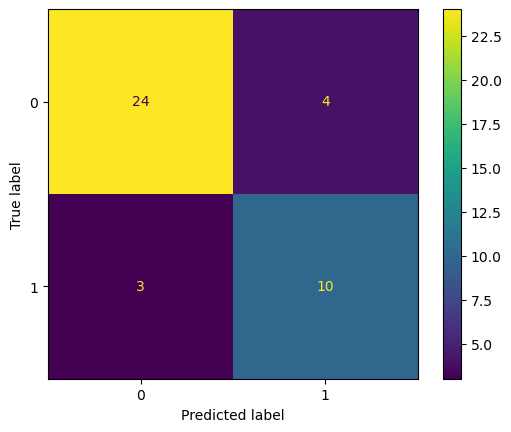


Evaluation: roc


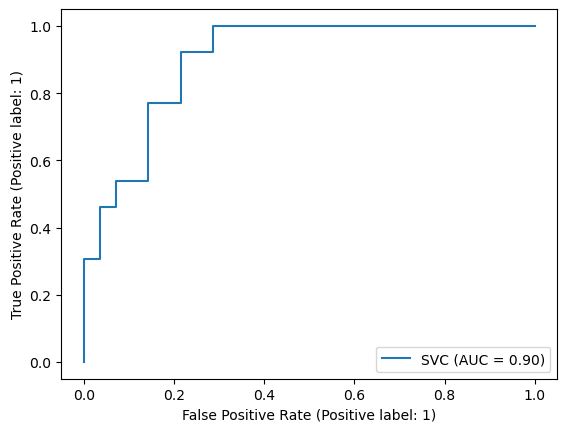

[(0.7558139534883721, 0.7407407407407408),
 (0.8189655172413793, 0.8292682926829268),
 (0.8666666666666667, 0.7692307692307693),
 (0.6701030927835051, 0.7142857142857143)]

In [11]:
f1_best_model_rand = load_model(svm_model, 'f1_macro', ros='final', search='random')
model_eval(f1_best_model_rand, X_train, X_test, y_train, y_test, confusion=True, roc=True)

### with oversampled dataset


Evaluation: f1_score
86.69% for the train data
70.37% for the test data

Evaluation: accuracy_score
86.43% for the train data
80.49% for the test data

Evaluation: recall_score
88.37% for the train data
73.08% for the test data

Evaluation: precision_score
85.07% for the train data
67.86% for the test data

Evaluation: confusion_matrix


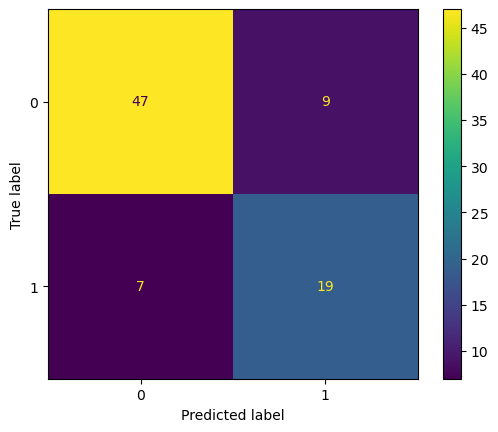


Evaluation: roc


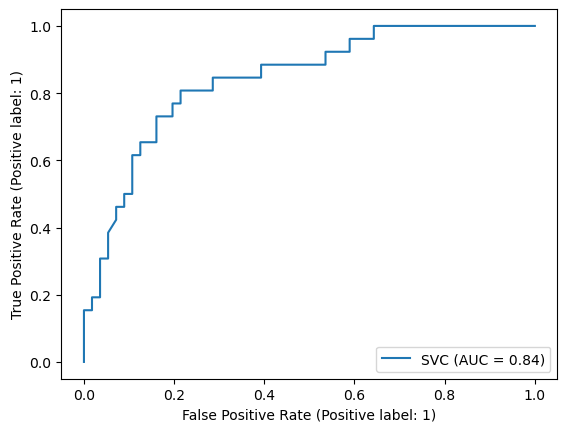

[(0.8669201520912547, 0.7037037037037038),
 (0.8643410852713178, 0.8048780487804879),
 (0.8837209302325582, 0.7307692307692307),
 (0.8507462686567164, 0.6785714285714286)]

In [14]:
# best setting with normal data set, evaluated on oversampled dataset
model_eval(f1_best_model_grid, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)


Evaluation: f1_score
86.57% for the train data
67.80% for the test data

Evaluation: accuracy_score
86.05% for the train data
76.83% for the test data

Evaluation: recall_score
89.92% for the train data
76.92% for the test data

Evaluation: precision_score
83.45% for the train data
60.61% for the test data

Evaluation: confusion_matrix


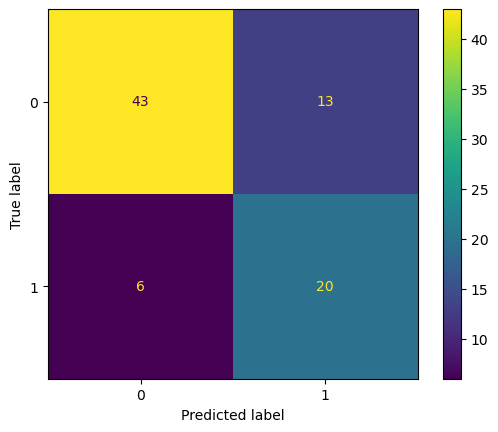


Evaluation: roc


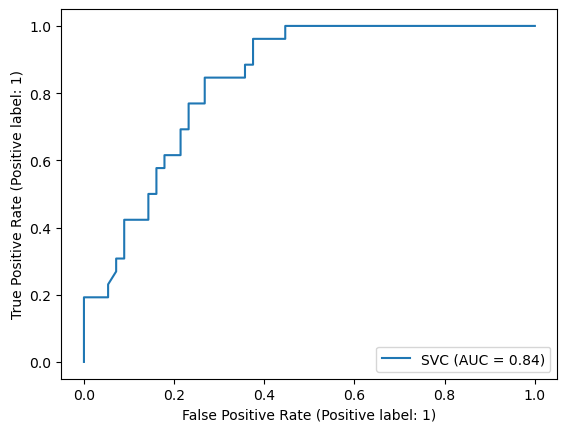

[(0.8656716417910448, 0.6779661016949152),
 (0.8604651162790697, 0.7682926829268293),
 (0.8992248062015504, 0.7692307692307693),
 (0.8345323741007195, 0.6060606060606061)]

In [15]:
model_eval(f1_best_model_rand, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [ ]:
# find best setting for oversampled dataset
svm_model2 = svm.SVC(random_state=0)

In [ ]:
run_gridsearchCV(svm_model2, grid_svm, X_train2, y_train2, scoring='f1_macro', ros='final_ros', verbose=0)

In [ ]:
f1_best_model_grid2 = load_model(svm_model2, 'f1_macro', ros='final_ros', search='grid')
model_eval(f1_best_model_grid2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [ ]:
run_randomizedsearchCV(svm_model2, rand_svm, X_train2, y_train2, scoring='f1_macro', ros='final_ros', verbose=0)

In [ ]:
f1_best_model_rand2 = load_model(svm_model2, 'f1_macro', ros='final_ros', search='random')
model_eval(f1_best_model_rand2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

# 4) Extensive hyperparemeter search with the best model (oversampled dataset)